In [1]:
import os, glob
from skimage import io
import cv2
from skimage.color import rgb2gray
from tqdm import tqdm
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
path = os.getcwd()
path

'C:\\Users\\Supervisor\\Desktop\\Koç Holding Bootcamp'

In [3]:
img_list   = []
label_list = []

for i in tqdm(range(10)):
    file_path = path + '\\spectrograms\\' + str(i)
    
    os.chdir(file_path)
    
    for filename in glob.glob('*.png'):
        img      = io.imread(filename)
        gray_img = rgb2gray(img)
        
        img_list.append(gray_img)
        label_list.append(i)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:11<00:00, 13.18s/it]


In [4]:
'''img_list = np.array(img_list)
label_list = np.array(label_list)'''

X = np.array(img_list,dtype=np.float16)
y = np.array(label_list, dtype=np.int8)



'''X, y = img_list[:,0], img_list[:,1]

X_main, X_test, y_main, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_main,y_main,test_size=0.1,random_state=42)'''

'X, y = img_list[:,0], img_list[:,1]\n\nX_main, X_test, y_main, y_test = train_test_split(X,y,test_size=0.1,random_state=42)\nX_train, X_val, y_train, y_val = train_test_split(X_main,y_main,test_size=0.1,random_state=42)'

In [5]:
del img_list
del label_list

In [6]:
X_main, X_test, y_main, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_main,y_main,test_size=0.1,random_state=42)

In [7]:
del X
del y

In [8]:
del X_main
del y_main

In [9]:
X_train = np.reshape(X_train,(7072, 374, 500, 1))
X_val = np.reshape(X_val,(786, 374, 500, 1))
X_test = np.reshape(X_test,(874, 374, 500, 1))

In [10]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7072, 374, 500, 1)
(786, 374, 500, 1)
(874, 374, 500, 1)


In [12]:
'''df_X_train = pd.DataFrame(X_train,columns=['X_train'])
df_X_val   = pd.DataFrame(X_val,columns=['X_val'])
df_X_test  = pd.DataFrame(X_test,columns=['X_test'])

df_y_train = pd.DataFrame(y_train,columns=['y_train'])
df_y_val   = pd.DataFrame(y_val,columns=['y_val'])
df_y_test  = pd.DataFrame(y_test,columns=['y_test'])'''

"df_X_train = pd.DataFrame(X_train,columns=['X_train'])\ndf_X_val   = pd.DataFrame(X_val,columns=['X_val'])\ndf_X_test  = pd.DataFrame(X_test,columns=['X_test'])\n\ndf_y_train = pd.DataFrame(y_train,columns=['y_train'])\ndf_y_val   = pd.DataFrame(y_val,columns=['y_val'])\ndf_y_test  = pd.DataFrame(y_test,columns=['y_test'])"

In [13]:
'''df_X_train.to_csv(path+'\\X_train.csv')
df_X_val.to_csv(path+'\\X_val.csv')
df_X_test.to_csv(path+'\\X_test.csv')

df_y_train.to_csv(path+'\\y_train.csv')
df_y_val.to_csv(path+'\\y_val.csv')
df_y_test.to_csv(path+'\\y_test.csv')'''

"df_X_train.to_csv(path+'\\X_train.csv')\ndf_X_val.to_csv(path+'\\X_val.csv')\ndf_X_test.to_csv(path+'\\X_test.csv')\n\ndf_y_train.to_csv(path+'\\y_train.csv')\ndf_y_val.to_csv(path+'\\y_val.csv')\ndf_y_test.to_csv(path+'\\y_test.csv')"

## Modelin Eğitilmesi

In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [15]:
d1, n, m, d4 = X_train.shape

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(n, m, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 372, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 186, 249, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 186, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 184, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 92, 123, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 92, 123, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 724224)            0

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32)

Train on 7072 samples, validate on 786 samples
Epoch 1/50


6464/7072 [==========================>...] - ETA: 35:26 - loss: 2.2856 - acc: 0.0000e+ - ETA: 27:12 - loss: 21.3008 - acc: 0.0469   - ETA: 24:23 - loss: 20.4860 - acc: 0.072 - ETA: 22:45 - loss: 17.5644 - acc: 0.132 - ETA: 21:38 - loss: 16.1986 - acc: 0.131 - ETA: 20:55 - loss: 14.8273 - acc: 0.140 - ETA: 20:22 - loss: 13.4962 - acc: 0.147 - ETA: 19:54 - loss: 12.6449 - acc: 0.136 - ETA: 19:44 - loss: 11.5990 - acc: 0.149 - ETA: 19:27 - loss: 10.7689 - acc: 0.150 - ETA: 19:13 - loss: 10.0484 - acc: 0.150 - ETA: 18:59 - loss: 9.4168 - acc: 0.156 - ETA: 18:50 - loss: 8.8469 - acc: 0.16 - ETA: 18:39 - loss: 8.3628 - acc: 0.16 - ETA: 18:28 - loss: 7.9585 - acc: 0.16 - ETA: 18:18 - loss: 7.5959 - acc: 0.16 - ETA: 18:08 - loss: 7.2696 - acc: 0.17 - ETA: 17:59 - loss: 6.9837 - acc: 0.16 - ETA: 17:50 - loss: 6.7288 - acc: 0.17 - ETA: 17:42 - loss: 6.4971 - acc: 0.17 - ETA: 17:34 - loss: 6.2930 - acc: 0.17 - ETA: 17:26 - loss: 6.1054 - acc: 0.17 - ETA: 17:18 - loss: 5.9287 - acc: 0.17 - ETA: 17

7072/7072 [==============================] - ETA: 1:41 - loss: 2.1134 - acc: 0.383 - ETA: 1:35 - loss: 2.1086 - acc: 0.385 - ETA: 1:30 - loss: 2.1040 - acc: 0.386 - ETA: 1:24 - loss: 2.1004 - acc: 0.386 - ETA: 1:18 - loss: 2.0953 - acc: 0.387 - ETA: 1:13 - loss: 2.0918 - acc: 0.388 - ETA: 1:07 - loss: 2.0868 - acc: 0.389 - ETA: 1:01 - loss: 2.0807 - acc: 0.391 - ETA: 56s - loss: 2.0763 - acc: 0.392 - ETA: 50s - loss: 2.0723 - acc: 0.39 - ETA: 44s - loss: 2.0679 - acc: 0.39 - ETA: 39s - loss: 2.0643 - acc: 0.39 - ETA: 33s - loss: 2.0594 - acc: 0.39 - ETA: 28s - loss: 2.0537 - acc: 0.39 - ETA: 22s - loss: 2.0496 - acc: 0.39 - ETA: 16s - loss: 2.0454 - acc: 0.40 - ETA: 11s - loss: 2.0418 - acc: 0.40 - ETA: 5s - loss: 2.0387 - acc: 0.4018 - 1279s 181ms/sample - loss: 2.0363 - acc: 0.4021 - val_loss: 1.2704 - val_acc: 0.5827
Epoch 2/50


6528/7072 [==========================>...] - ETA: 27:57 - loss: 1.2507 - acc: 0.46 - ETA: 28:10 - loss: 1.0282 - acc: 0.59 - ETA: 27:55 - loss: 1.0012 - acc: 0.64 - ETA: 28:00 - loss: 1.0605 - acc: 0.64 - ETA: 28:09 - loss: 1.0791 - acc: 0.62 - ETA: 28:00 - loss: 1.0667 - acc: 0.61 - ETA: 27:43 - loss: 1.0616 - acc: 0.59 - ETA: 27:40 - loss: 1.0537 - acc: 0.60 - ETA: 27:24 - loss: 1.0662 - acc: 0.61 - ETA: 27:09 - loss: 1.0874 - acc: 0.61 - ETA: 26:54 - loss: 1.0946 - acc: 0.61 - ETA: 26:49 - loss: 1.0797 - acc: 0.62 - ETA: 26:23 - loss: 1.0774 - acc: 0.62 - ETA: 25:40 - loss: 1.0839 - acc: 0.62 - ETA: 25:01 - loss: 1.0769 - acc: 0.62 - ETA: 24:32 - loss: 1.0689 - acc: 0.63 - ETA: 24:06 - loss: 1.0757 - acc: 0.62 - ETA: 24:02 - loss: 1.0717 - acc: 0.63 - ETA: 23:59 - loss: 1.0703 - acc: 0.63 - ETA: 23:56 - loss: 1.0697 - acc: 0.63 - ETA: 23:39 - loss: 1.0673 - acc: 0.63 - ETA: 23:21 - loss: 1.0695 - acc: 0.63 - ETA: 23:03 - loss: 1.0666 - acc: 0.63 - ETA: 22:51 - loss: 1.0579 - acc: 0.

7072/7072 [==============================] - ETA: 1:32 - loss: 0.9740 - acc: 0.670 - ETA: 1:26 - loss: 0.9736 - acc: 0.670 - ETA: 1:20 - loss: 0.9730 - acc: 0.670 - ETA: 1:15 - loss: 0.9709 - acc: 0.670 - ETA: 1:09 - loss: 0.9738 - acc: 0.670 - ETA: 1:03 - loss: 0.9738 - acc: 0.670 - ETA: 57s - loss: 0.9730 - acc: 0.671 - ETA: 51s - loss: 0.9719 - acc: 0.67 - ETA: 46s - loss: 0.9718 - acc: 0.67 - ETA: 40s - loss: 0.9701 - acc: 0.67 - ETA: 34s - loss: 0.9703 - acc: 0.67 - ETA: 28s - loss: 0.9703 - acc: 0.67 - ETA: 22s - loss: 0.9709 - acc: 0.67 - ETA: 17s - loss: 0.9703 - acc: 0.67 - ETA: 11s - loss: 0.9696 - acc: 0.67 - ETA: 5s - loss: 0.9684 - acc: 0.6734 - 1286s 182ms/sample - loss: 0.9683 - acc: 0.6732 - val_loss: 1.0096 - val_acc: 0.6705
Epoch 3/50


6528/7072 [==========================>...] - ETA: 18:36 - loss: 0.7673 - acc: 0.68 - ETA: 18:23 - loss: 0.6701 - acc: 0.76 - ETA: 18:12 - loss: 0.6829 - acc: 0.72 - ETA: 18:01 - loss: 0.7263 - acc: 0.73 - ETA: 17:49 - loss: 0.7036 - acc: 0.75 - ETA: 17:40 - loss: 0.7211 - acc: 0.75 - ETA: 17:31 - loss: 0.7051 - acc: 0.74 - ETA: 17:22 - loss: 0.7191 - acc: 0.74 - ETA: 17:14 - loss: 0.6770 - acc: 0.76 - ETA: 17:13 - loss: 0.6938 - acc: 0.75 - ETA: 17:10 - loss: 0.6939 - acc: 0.75 - ETA: 17:10 - loss: 0.6814 - acc: 0.76 - ETA: 17:07 - loss: 0.6849 - acc: 0.76 - ETA: 17:02 - loss: 0.6820 - acc: 0.76 - ETA: 16:55 - loss: 0.6680 - acc: 0.77 - ETA: 16:50 - loss: 0.6720 - acc: 0.77 - ETA: 16:47 - loss: 0.6700 - acc: 0.77 - ETA: 16:41 - loss: 0.6761 - acc: 0.77 - ETA: 16:37 - loss: 0.6697 - acc: 0.77 - ETA: 16:32 - loss: 0.6578 - acc: 0.78 - ETA: 16:26 - loss: 0.6608 - acc: 0.78 - ETA: 16:20 - loss: 0.6741 - acc: 0.77 - ETA: 16:15 - loss: 0.6682 - acc: 0.77 - ETA: 16:09 - loss: 0.6676 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.6715 - acc: 0.781 - ETA: 1:12 - loss: 0.6715 - acc: 0.781 - ETA: 1:07 - loss: 0.6722 - acc: 0.781 - ETA: 1:03 - loss: 0.6716 - acc: 0.781 - ETA: 58s - loss: 0.6710 - acc: 0.781 - ETA: 53s - loss: 0.6718 - acc: 0.78 - ETA: 48s - loss: 0.6711 - acc: 0.78 - ETA: 43s - loss: 0.6707 - acc: 0.78 - ETA: 38s - loss: 0.6707 - acc: 0.78 - ETA: 33s - loss: 0.6702 - acc: 0.78 - ETA: 29s - loss: 0.6707 - acc: 0.78 - ETA: 24s - loss: 0.6713 - acc: 0.78 - ETA: 19s - loss: 0.6710 - acc: 0.78 - ETA: 14s - loss: 0.6705 - acc: 0.78 - ETA: 9s - loss: 0.6706 - acc: 0.7827 - ETA: 4s - loss: 0.6695 - acc: 0.783 - 1094s 155ms/sample - loss: 0.6697 - acc: 0.7837 - val_loss: 0.8317 - val_acc: 0.7392
Epoch 4/50


6528/7072 [==========================>...] - ETA: 17:40 - loss: 0.2964 - acc: 0.93 - ETA: 18:08 - loss: 0.3322 - acc: 0.92 - ETA: 18:07 - loss: 0.3511 - acc: 0.90 - ETA: 17:51 - loss: 0.3803 - acc: 0.88 - ETA: 17:47 - loss: 0.3482 - acc: 0.90 - ETA: 17:36 - loss: 0.3462 - acc: 0.89 - ETA: 17:29 - loss: 0.3324 - acc: 0.89 - ETA: 17:20 - loss: 0.3504 - acc: 0.88 - ETA: 17:16 - loss: 0.3496 - acc: 0.88 - ETA: 17:09 - loss: 0.3743 - acc: 0.88 - ETA: 17:03 - loss: 0.3756 - acc: 0.88 - ETA: 16:57 - loss: 0.3831 - acc: 0.88 - ETA: 16:48 - loss: 0.3852 - acc: 0.87 - ETA: 16:42 - loss: 0.3818 - acc: 0.88 - ETA: 16:37 - loss: 0.3813 - acc: 0.88 - ETA: 16:32 - loss: 0.3830 - acc: 0.88 - ETA: 16:27 - loss: 0.3785 - acc: 0.88 - ETA: 16:22 - loss: 0.3852 - acc: 0.88 - ETA: 16:16 - loss: 0.3792 - acc: 0.88 - ETA: 16:11 - loss: 0.3860 - acc: 0.88 - ETA: 16:07 - loss: 0.3924 - acc: 0.88 - ETA: 16:02 - loss: 0.3850 - acc: 0.88 - ETA: 15:57 - loss: 0.3737 - acc: 0.88 - ETA: 15:52 - loss: 0.3799 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.3879 - acc: 0.876 - ETA: 1:13 - loss: 0.3880 - acc: 0.876 - ETA: 1:08 - loss: 0.3891 - acc: 0.876 - ETA: 1:03 - loss: 0.3887 - acc: 0.876 - ETA: 58s - loss: 0.3882 - acc: 0.876 - ETA: 53s - loss: 0.3889 - acc: 0.87 - ETA: 48s - loss: 0.3897 - acc: 0.87 - ETA: 44s - loss: 0.3892 - acc: 0.87 - ETA: 39s - loss: 0.3885 - acc: 0.87 - ETA: 34s - loss: 0.3887 - acc: 0.87 - ETA: 29s - loss: 0.3886 - acc: 0.87 - ETA: 24s - loss: 0.3899 - acc: 0.87 - ETA: 19s - loss: 0.3899 - acc: 0.87 - ETA: 14s - loss: 0.3912 - acc: 0.87 - ETA: 9s - loss: 0.3921 - acc: 0.8751 - ETA: 4s - loss: 0.3920 - acc: 0.875 - 1101s 156ms/sample - loss: 0.3911 - acc: 0.8756 - val_loss: 0.9245 - val_acc: 0.7010
Epoch 5/50


6528/7072 [==========================>...] - ETA: 18:09 - loss: 0.3614 - acc: 0.81 - ETA: 17:45 - loss: 0.3352 - acc: 0.82 - ETA: 17:38 - loss: 0.3444 - acc: 0.84 - ETA: 17:27 - loss: 0.2853 - acc: 0.88 - ETA: 17:27 - loss: 0.2864 - acc: 0.88 - ETA: 17:30 - loss: 0.2721 - acc: 0.89 - ETA: 17:34 - loss: 0.2580 - acc: 0.91 - ETA: 17:26 - loss: 0.2586 - acc: 0.91 - ETA: 17:18 - loss: 0.2578 - acc: 0.90 - ETA: 17:11 - loss: 0.2486 - acc: 0.91 - ETA: 17:04 - loss: 0.2572 - acc: 0.91 - ETA: 16:59 - loss: 0.2494 - acc: 0.91 - ETA: 16:52 - loss: 0.2491 - acc: 0.90 - ETA: 16:47 - loss: 0.2543 - acc: 0.90 - ETA: 16:41 - loss: 0.2468 - acc: 0.91 - ETA: 16:34 - loss: 0.2408 - acc: 0.91 - ETA: 16:28 - loss: 0.2299 - acc: 0.91 - ETA: 16:23 - loss: 0.2348 - acc: 0.91 - ETA: 16:18 - loss: 0.2319 - acc: 0.91 - ETA: 16:16 - loss: 0.2300 - acc: 0.92 - ETA: 16:11 - loss: 0.2279 - acc: 0.92 - ETA: 16:05 - loss: 0.2259 - acc: 0.92 - ETA: 15:59 - loss: 0.2241 - acc: 0.92 - ETA: 15:54 - loss: 0.2284 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.1847 - acc: 0.944 - ETA: 1:13 - loss: 0.1846 - acc: 0.944 - ETA: 1:08 - loss: 0.1854 - acc: 0.943 - ETA: 1:03 - loss: 0.1856 - acc: 0.943 - ETA: 58s - loss: 0.1858 - acc: 0.943 - ETA: 54s - loss: 0.1860 - acc: 0.94 - ETA: 49s - loss: 0.1862 - acc: 0.94 - ETA: 44s - loss: 0.1859 - acc: 0.94 - ETA: 39s - loss: 0.1854 - acc: 0.94 - ETA: 34s - loss: 0.1850 - acc: 0.94 - ETA: 29s - loss: 0.1848 - acc: 0.94 - ETA: 24s - loss: 0.1858 - acc: 0.94 - ETA: 19s - loss: 0.1852 - acc: 0.94 - ETA: 14s - loss: 0.1852 - acc: 0.94 - ETA: 9s - loss: 0.1852 - acc: 0.9426 - ETA: 4s - loss: 0.1848 - acc: 0.942 - 1107s 156ms/sample - loss: 0.1850 - acc: 0.9429 - val_loss: 0.9727 - val_acc: 0.7328
Epoch 6/50


6528/7072 [==========================>...] - ETA: 18:49 - loss: 0.1802 - acc: 0.93 - ETA: 18:30 - loss: 0.1632 - acc: 0.95 - ETA: 18:09 - loss: 0.1216 - acc: 0.96 - ETA: 17:59 - loss: 0.1178 - acc: 0.96 - ETA: 17:48 - loss: 0.1219 - acc: 0.95 - ETA: 17:43 - loss: 0.1240 - acc: 0.95 - ETA: 17:38 - loss: 0.1252 - acc: 0.95 - ETA: 17:33 - loss: 0.1264 - acc: 0.96 - ETA: 17:25 - loss: 0.1202 - acc: 0.96 - ETA: 17:21 - loss: 0.1201 - acc: 0.95 - ETA: 17:15 - loss: 0.1259 - acc: 0.95 - ETA: 17:10 - loss: 0.1206 - acc: 0.96 - ETA: 17:06 - loss: 0.1235 - acc: 0.95 - ETA: 17:02 - loss: 0.1206 - acc: 0.95 - ETA: 16:57 - loss: 0.1238 - acc: 0.96 - ETA: 16:49 - loss: 0.1235 - acc: 0.95 - ETA: 16:42 - loss: 0.1172 - acc: 0.96 - ETA: 16:36 - loss: 0.1152 - acc: 0.96 - ETA: 16:30 - loss: 0.1112 - acc: 0.96 - ETA: 16:24 - loss: 0.1109 - acc: 0.96 - ETA: 16:19 - loss: 0.1097 - acc: 0.96 - ETA: 16:13 - loss: 0.1066 - acc: 0.96 - ETA: 16:09 - loss: 0.1037 - acc: 0.97 - ETA: 16:04 - loss: 0.1014 - acc: 0.

7072/7072 [==============================] - ETA: 1:22 - loss: 0.0807 - acc: 0.976 - ETA: 1:17 - loss: 0.0809 - acc: 0.976 - ETA: 1:12 - loss: 0.0808 - acc: 0.976 - ETA: 1:07 - loss: 0.0804 - acc: 0.976 - ETA: 1:01 - loss: 0.0810 - acc: 0.976 - ETA: 56s - loss: 0.0808 - acc: 0.976 - ETA: 51s - loss: 0.0805 - acc: 0.97 - ETA: 46s - loss: 0.0810 - acc: 0.97 - ETA: 41s - loss: 0.0811 - acc: 0.97 - ETA: 36s - loss: 0.0819 - acc: 0.97 - ETA: 30s - loss: 0.0818 - acc: 0.97 - ETA: 25s - loss: 0.0818 - acc: 0.97 - ETA: 20s - loss: 0.0820 - acc: 0.97 - ETA: 15s - loss: 0.0822 - acc: 0.97 - ETA: 10s - loss: 0.0821 - acc: 0.97 - ETA: 5s - loss: 0.0818 - acc: 0.9756 - 1163s 164ms/sample - loss: 0.0819 - acc: 0.9755 - val_loss: 0.9560 - val_acc: 0.7494
Epoch 7/50


6528/7072 [==========================>...] - ETA: 18:34 - loss: 0.0300 - acc: 1.00 - ETA: 18:34 - loss: 0.0375 - acc: 1.00 - ETA: 18:31 - loss: 0.0568 - acc: 0.98 - ETA: 18:31 - loss: 0.0494 - acc: 0.99 - ETA: 18:35 - loss: 0.0449 - acc: 0.99 - ETA: 18:53 - loss: 0.0464 - acc: 0.98 - ETA: 18:43 - loss: 0.0463 - acc: 0.98 - ETA: 18:33 - loss: 0.0486 - acc: 0.98 - ETA: 18:24 - loss: 0.0452 - acc: 0.98 - ETA: 18:17 - loss: 0.0441 - acc: 0.98 - ETA: 18:18 - loss: 0.0506 - acc: 0.98 - ETA: 18:18 - loss: 0.0491 - acc: 0.98 - ETA: 18:14 - loss: 0.0506 - acc: 0.98 - ETA: 18:15 - loss: 0.0478 - acc: 0.98 - ETA: 18:26 - loss: 0.0495 - acc: 0.98 - ETA: 18:19 - loss: 0.0556 - acc: 0.98 - ETA: 18:16 - loss: 0.0565 - acc: 0.98 - ETA: 18:12 - loss: 0.0598 - acc: 0.98 - ETA: 18:08 - loss: 0.0653 - acc: 0.98 - ETA: 18:06 - loss: 0.0647 - acc: 0.98 - ETA: 18:01 - loss: 0.0696 - acc: 0.98 - ETA: 17:58 - loss: 0.0719 - acc: 0.98 - ETA: 17:50 - loss: 0.0699 - acc: 0.98 - ETA: 17:43 - loss: 0.0711 - acc: 0.

7072/7072 [==============================] - ETA: 1:26 - loss: 0.0539 - acc: 0.986 - ETA: 1:20 - loss: 0.0541 - acc: 0.986 - ETA: 1:15 - loss: 0.0541 - acc: 0.986 - ETA: 1:10 - loss: 0.0541 - acc: 0.986 - ETA: 1:04 - loss: 0.0539 - acc: 0.986 - ETA: 59s - loss: 0.0541 - acc: 0.986 - ETA: 53s - loss: 0.0552 - acc: 0.98 - ETA: 48s - loss: 0.0558 - acc: 0.98 - ETA: 43s - loss: 0.0562 - acc: 0.98 - ETA: 37s - loss: 0.0561 - acc: 0.98 - ETA: 32s - loss: 0.0563 - acc: 0.98 - ETA: 26s - loss: 0.0563 - acc: 0.98 - ETA: 21s - loss: 0.0565 - acc: 0.98 - ETA: 16s - loss: 0.0572 - acc: 0.98 - ETA: 10s - loss: 0.0575 - acc: 0.98 - ETA: 5s - loss: 0.0578 - acc: 0.9854 - 1209s 171ms/sample - loss: 0.0577 - acc: 0.9854 - val_loss: 1.1260 - val_acc: 0.7366
Epoch 8/50


6528/7072 [==========================>...] - ETA: 17:47 - loss: 0.0342 - acc: 1.00 - ETA: 17:40 - loss: 0.0837 - acc: 0.96 - ETA: 17:45 - loss: 0.0620 - acc: 0.97 - ETA: 17:50 - loss: 0.0592 - acc: 0.98 - ETA: 17:55 - loss: 0.0520 - acc: 0.98 - ETA: 18:00 - loss: 0.0492 - acc: 0.98 - ETA: 18:01 - loss: 0.0483 - acc: 0.98 - ETA: 17:53 - loss: 0.0456 - acc: 0.98 - ETA: 17:47 - loss: 0.0435 - acc: 0.98 - ETA: 17:39 - loss: 0.0413 - acc: 0.99 - ETA: 17:30 - loss: 0.0394 - acc: 0.99 - ETA: 17:23 - loss: 0.0377 - acc: 0.99 - ETA: 17:16 - loss: 0.0351 - acc: 0.99 - ETA: 17:11 - loss: 0.0340 - acc: 0.99 - ETA: 17:04 - loss: 0.0335 - acc: 0.99 - ETA: 16:59 - loss: 0.0318 - acc: 0.99 - ETA: 16:52 - loss: 0.0315 - acc: 0.99 - ETA: 16:48 - loss: 0.0308 - acc: 0.99 - ETA: 16:42 - loss: 0.0300 - acc: 0.99 - ETA: 16:38 - loss: 0.0313 - acc: 0.99 - ETA: 16:33 - loss: 0.0312 - acc: 0.99 - ETA: 16:28 - loss: 0.0348 - acc: 0.99 - ETA: 16:23 - loss: 0.0337 - acc: 0.99 - ETA: 16:18 - loss: 0.0337 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0339 - acc: 0.991 - ETA: 1:13 - loss: 0.0338 - acc: 0.992 - ETA: 1:08 - loss: 0.0338 - acc: 0.992 - ETA: 1:03 - loss: 0.0338 - acc: 0.991 - ETA: 58s - loss: 0.0338 - acc: 0.991 - ETA: 54s - loss: 0.0343 - acc: 0.99 - ETA: 49s - loss: 0.0347 - acc: 0.99 - ETA: 44s - loss: 0.0357 - acc: 0.99 - ETA: 39s - loss: 0.0357 - acc: 0.99 - ETA: 34s - loss: 0.0356 - acc: 0.99 - ETA: 29s - loss: 0.0357 - acc: 0.99 - ETA: 24s - loss: 0.0357 - acc: 0.99 - ETA: 19s - loss: 0.0357 - acc: 0.99 - ETA: 14s - loss: 0.0359 - acc: 0.99 - ETA: 9s - loss: 0.0363 - acc: 0.9910 - ETA: 4s - loss: 0.0365 - acc: 0.990 - 1108s 157ms/sample - loss: 0.0364 - acc: 0.9910 - val_loss: 1.1979 - val_acc: 0.7341
Epoch 9/50


6528/7072 [==========================>...] - ETA: 17:52 - loss: 0.0229 - acc: 1.00 - ETA: 17:40 - loss: 0.0150 - acc: 1.00 - ETA: 17:41 - loss: 0.0306 - acc: 0.98 - ETA: 17:31 - loss: 0.0515 - acc: 0.98 - ETA: 17:27 - loss: 0.0493 - acc: 0.98 - ETA: 17:19 - loss: 0.0510 - acc: 0.98 - ETA: 17:19 - loss: 0.0556 - acc: 0.98 - ETA: 17:12 - loss: 0.0510 - acc: 0.98 - ETA: 17:08 - loss: 0.0464 - acc: 0.98 - ETA: 17:09 - loss: 0.0456 - acc: 0.98 - ETA: 17:06 - loss: 0.0433 - acc: 0.98 - ETA: 17:01 - loss: 0.0406 - acc: 0.98 - ETA: 16:59 - loss: 0.0381 - acc: 0.99 - ETA: 16:54 - loss: 0.0366 - acc: 0.99 - ETA: 16:50 - loss: 0.0351 - acc: 0.99 - ETA: 16:44 - loss: 0.0399 - acc: 0.99 - ETA: 16:39 - loss: 0.0389 - acc: 0.99 - ETA: 16:33 - loss: 0.0374 - acc: 0.99 - ETA: 16:28 - loss: 0.0382 - acc: 0.99 - ETA: 16:22 - loss: 0.0366 - acc: 0.99 - ETA: 16:18 - loss: 0.0351 - acc: 0.99 - ETA: 16:12 - loss: 0.0338 - acc: 0.99 - ETA: 16:08 - loss: 0.0331 - acc: 0.99 - ETA: 16:02 - loss: 0.0320 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0366 - acc: 0.990 - ETA: 1:13 - loss: 0.0365 - acc: 0.990 - ETA: 1:08 - loss: 0.0365 - acc: 0.990 - ETA: 1:03 - loss: 0.0364 - acc: 0.990 - ETA: 58s - loss: 0.0363 - acc: 0.990 - ETA: 53s - loss: 0.0362 - acc: 0.99 - ETA: 49s - loss: 0.0360 - acc: 0.99 - ETA: 44s - loss: 0.0361 - acc: 0.99 - ETA: 39s - loss: 0.0360 - acc: 0.99 - ETA: 34s - loss: 0.0368 - acc: 0.99 - ETA: 29s - loss: 0.0368 - acc: 0.99 - ETA: 24s - loss: 0.0371 - acc: 0.99 - ETA: 19s - loss: 0.0373 - acc: 0.98 - ETA: 14s - loss: 0.0372 - acc: 0.99 - ETA: 9s - loss: 0.0371 - acc: 0.9900 - ETA: 4s - loss: 0.0371 - acc: 0.990 - 1105s 156ms/sample - loss: 0.0369 - acc: 0.9901 - val_loss: 1.1555 - val_acc: 0.7583
Epoch 10/50


6528/7072 [==========================>...] - ETA: 18:19 - loss: 0.0486 - acc: 0.96 - ETA: 18:21 - loss: 0.0283 - acc: 0.98 - ETA: 18:08 - loss: 0.0197 - acc: 0.98 - ETA: 18:02 - loss: 0.0275 - acc: 0.98 - ETA: 17:51 - loss: 0.0256 - acc: 0.98 - ETA: 17:40 - loss: 0.0219 - acc: 0.98 - ETA: 17:31 - loss: 0.0196 - acc: 0.99 - ETA: 17:25 - loss: 0.0183 - acc: 0.99 - ETA: 17:18 - loss: 0.0182 - acc: 0.99 - ETA: 17:11 - loss: 0.0169 - acc: 0.99 - ETA: 17:04 - loss: 0.0157 - acc: 0.99 - ETA: 16:59 - loss: 0.0214 - acc: 0.99 - ETA: 16:55 - loss: 0.0219 - acc: 0.99 - ETA: 16:49 - loss: 0.0225 - acc: 0.99 - ETA: 16:42 - loss: 0.0212 - acc: 0.99 - ETA: 16:35 - loss: 0.0217 - acc: 0.99 - ETA: 16:30 - loss: 0.0220 - acc: 0.99 - ETA: 16:25 - loss: 0.0217 - acc: 0.99 - ETA: 16:21 - loss: 0.0231 - acc: 0.99 - ETA: 16:15 - loss: 0.0224 - acc: 0.99 - ETA: 16:11 - loss: 0.0221 - acc: 0.99 - ETA: 16:06 - loss: 0.0225 - acc: 0.99 - ETA: 16:03 - loss: 0.0220 - acc: 0.99 - ETA: 15:58 - loss: 0.0228 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0160 - acc: 0.995 - ETA: 1:13 - loss: 0.0161 - acc: 0.995 - ETA: 1:08 - loss: 0.0160 - acc: 0.995 - ETA: 1:03 - loss: 0.0160 - acc: 0.995 - ETA: 58s - loss: 0.0166 - acc: 0.995 - ETA: 54s - loss: 0.0170 - acc: 0.99 - ETA: 49s - loss: 0.0169 - acc: 0.99 - ETA: 44s - loss: 0.0168 - acc: 0.99 - ETA: 39s - loss: 0.0168 - acc: 0.99 - ETA: 34s - loss: 0.0167 - acc: 0.99 - ETA: 29s - loss: 0.0167 - acc: 0.99 - ETA: 24s - loss: 0.0167 - acc: 0.99 - ETA: 19s - loss: 0.0167 - acc: 0.99 - ETA: 14s - loss: 0.0168 - acc: 0.99 - ETA: 9s - loss: 0.0170 - acc: 0.9951 - ETA: 4s - loss: 0.0170 - acc: 0.995 - 1111s 157ms/sample - loss: 0.0170 - acc: 0.9952 - val_loss: 1.2055 - val_acc: 0.7494
Epoch 11/50


6528/7072 [==========================>...] - ETA: 19:43 - loss: 0.0026 - acc: 1.00 - ETA: 19:09 - loss: 0.0052 - acc: 1.00 - ETA: 18:45 - loss: 0.0044 - acc: 1.00 - ETA: 18:32 - loss: 0.0050 - acc: 1.00 - ETA: 18:21 - loss: 0.0058 - acc: 1.00 - ETA: 18:09 - loss: 0.0052 - acc: 1.00 - ETA: 18:01 - loss: 0.0202 - acc: 0.99 - ETA: 17:55 - loss: 0.0196 - acc: 0.99 - ETA: 17:47 - loss: 0.0186 - acc: 0.99 - ETA: 17:44 - loss: 0.0180 - acc: 0.99 - ETA: 17:52 - loss: 0.0168 - acc: 0.99 - ETA: 17:51 - loss: 0.0159 - acc: 0.99 - ETA: 17:50 - loss: 0.0149 - acc: 0.99 - ETA: 17:49 - loss: 0.0142 - acc: 0.99 - ETA: 17:43 - loss: 0.0137 - acc: 0.99 - ETA: 17:38 - loss: 0.0141 - acc: 0.99 - ETA: 17:31 - loss: 0.0164 - acc: 0.99 - ETA: 17:24 - loss: 0.0208 - acc: 0.99 - ETA: 17:16 - loss: 0.0207 - acc: 0.99 - ETA: 17:11 - loss: 0.0214 - acc: 0.99 - ETA: 17:03 - loss: 0.0208 - acc: 0.99 - ETA: 16:56 - loss: 0.0201 - acc: 0.99 - ETA: 16:49 - loss: 0.0194 - acc: 0.99 - ETA: 16:43 - loss: 0.0208 - acc: 0.

7072/7072 [==============================] - ETA: 1:19 - loss: 0.0307 - acc: 0.990 - ETA: 1:14 - loss: 0.0306 - acc: 0.990 - ETA: 1:09 - loss: 0.0308 - acc: 0.990 - ETA: 1:04 - loss: 0.0312 - acc: 0.990 - ETA: 59s - loss: 0.0313 - acc: 0.990 - ETA: 54s - loss: 0.0315 - acc: 0.99 - ETA: 49s - loss: 0.0313 - acc: 0.99 - ETA: 44s - loss: 0.0314 - acc: 0.99 - ETA: 39s - loss: 0.0321 - acc: 0.99 - ETA: 34s - loss: 0.0320 - acc: 0.99 - ETA: 29s - loss: 0.0319 - acc: 0.99 - ETA: 24s - loss: 0.0318 - acc: 0.99 - ETA: 19s - loss: 0.0317 - acc: 0.99 - ETA: 14s - loss: 0.0317 - acc: 0.99 - ETA: 9s - loss: 0.0316 - acc: 0.9903 - ETA: 4s - loss: 0.0325 - acc: 0.990 - 1113s 157ms/sample - loss: 0.0328 - acc: 0.9898 - val_loss: 1.4910 - val_acc: 0.7455
Epoch 12/50


6528/7072 [==========================>...] - ETA: 17:38 - loss: 0.0272 - acc: 1.00 - ETA: 17:41 - loss: 0.0261 - acc: 1.00 - ETA: 17:38 - loss: 0.0288 - acc: 1.00 - ETA: 17:33 - loss: 0.0223 - acc: 1.00 - ETA: 17:32 - loss: 0.0188 - acc: 1.00 - ETA: 17:28 - loss: 0.0171 - acc: 1.00 - ETA: 17:29 - loss: 0.0203 - acc: 1.00 - ETA: 17:25 - loss: 0.0186 - acc: 1.00 - ETA: 17:20 - loss: 0.0233 - acc: 0.99 - ETA: 17:11 - loss: 0.0259 - acc: 0.99 - ETA: 17:05 - loss: 0.0273 - acc: 0.99 - ETA: 17:02 - loss: 0.0267 - acc: 0.99 - ETA: 16:59 - loss: 0.0267 - acc: 0.99 - ETA: 16:54 - loss: 0.0250 - acc: 0.99 - ETA: 16:47 - loss: 0.0263 - acc: 0.99 - ETA: 16:42 - loss: 0.0248 - acc: 0.99 - ETA: 16:36 - loss: 0.0243 - acc: 0.99 - ETA: 16:32 - loss: 0.0231 - acc: 0.99 - ETA: 16:27 - loss: 0.0221 - acc: 0.99 - ETA: 16:21 - loss: 0.0214 - acc: 0.99 - ETA: 16:16 - loss: 0.0206 - acc: 0.99 - ETA: 16:10 - loss: 0.0209 - acc: 0.99 - ETA: 16:05 - loss: 0.0218 - acc: 0.99 - ETA: 16:02 - loss: 0.0212 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0272 - acc: 0.992 - ETA: 1:13 - loss: 0.0275 - acc: 0.992 - ETA: 1:08 - loss: 0.0274 - acc: 0.992 - ETA: 1:03 - loss: 0.0284 - acc: 0.992 - ETA: 58s - loss: 0.0284 - acc: 0.992 - ETA: 53s - loss: 0.0292 - acc: 0.99 - ETA: 49s - loss: 0.0293 - acc: 0.99 - ETA: 44s - loss: 0.0294 - acc: 0.99 - ETA: 39s - loss: 0.0294 - acc: 0.99 - ETA: 34s - loss: 0.0298 - acc: 0.99 - ETA: 29s - loss: 0.0297 - acc: 0.99 - ETA: 24s - loss: 0.0297 - acc: 0.99 - ETA: 19s - loss: 0.0300 - acc: 0.99 - ETA: 14s - loss: 0.0300 - acc: 0.99 - ETA: 9s - loss: 0.0300 - acc: 0.9917 - ETA: 4s - loss: 0.0302 - acc: 0.991 - 1105s 156ms/sample - loss: 0.0302 - acc: 0.9914 - val_loss: 1.3705 - val_acc: 0.7646
Epoch 13/50


6528/7072 [==========================>...] - ETA: 18:14 - loss: 0.0175 - acc: 1.00 - ETA: 18:24 - loss: 0.0184 - acc: 1.00 - ETA: 18:11 - loss: 0.0197 - acc: 1.00 - ETA: 17:52 - loss: 0.0161 - acc: 1.00 - ETA: 17:41 - loss: 0.0211 - acc: 0.99 - ETA: 17:36 - loss: 0.0204 - acc: 0.99 - ETA: 17:32 - loss: 0.0192 - acc: 0.99 - ETA: 17:26 - loss: 0.0190 - acc: 0.99 - ETA: 17:20 - loss: 0.0231 - acc: 0.99 - ETA: 17:17 - loss: 0.0275 - acc: 0.99 - ETA: 17:17 - loss: 0.0288 - acc: 0.99 - ETA: 17:11 - loss: 0.0310 - acc: 0.98 - ETA: 17:07 - loss: 0.0298 - acc: 0.99 - ETA: 17:01 - loss: 0.0280 - acc: 0.99 - ETA: 16:55 - loss: 0.0265 - acc: 0.99 - ETA: 16:48 - loss: 0.0306 - acc: 0.99 - ETA: 16:42 - loss: 0.0324 - acc: 0.98 - ETA: 16:36 - loss: 0.0389 - acc: 0.98 - ETA: 16:30 - loss: 0.0371 - acc: 0.98 - ETA: 16:24 - loss: 0.0386 - acc: 0.98 - ETA: 16:19 - loss: 0.0372 - acc: 0.98 - ETA: 16:13 - loss: 0.0357 - acc: 0.98 - ETA: 16:09 - loss: 0.0406 - acc: 0.98 - ETA: 16:03 - loss: 0.0453 - acc: 0.

7072/7072 [==============================] - ETA: 1:19 - loss: 0.0427 - acc: 0.986 - ETA: 1:14 - loss: 0.0428 - acc: 0.986 - ETA: 1:09 - loss: 0.0427 - acc: 0.986 - ETA: 1:04 - loss: 0.0425 - acc: 0.986 - ETA: 59s - loss: 0.0423 - acc: 0.986 - ETA: 54s - loss: 0.0425 - acc: 0.98 - ETA: 49s - loss: 0.0423 - acc: 0.98 - ETA: 44s - loss: 0.0424 - acc: 0.98 - ETA: 39s - loss: 0.0422 - acc: 0.98 - ETA: 34s - loss: 0.0422 - acc: 0.98 - ETA: 29s - loss: 0.0420 - acc: 0.98 - ETA: 24s - loss: 0.0421 - acc: 0.98 - ETA: 19s - loss: 0.0420 - acc: 0.98 - ETA: 14s - loss: 0.0418 - acc: 0.98 - ETA: 9s - loss: 0.0419 - acc: 0.9866 - ETA: 4s - loss: 0.0417 - acc: 0.986 - 1116s 158ms/sample - loss: 0.0415 - acc: 0.9867 - val_loss: 1.3526 - val_acc: 0.7659
Epoch 14/50


6528/7072 [==========================>...] - ETA: 17:55 - loss: 0.0038 - acc: 1.00 - ETA: 17:49 - loss: 0.0023 - acc: 1.00 - ETA: 17:39 - loss: 0.0061 - acc: 1.00 - ETA: 17:34 - loss: 0.0047 - acc: 1.00 - ETA: 17:28 - loss: 0.0658 - acc: 0.99 - ETA: 17:23 - loss: 0.0558 - acc: 0.99 - ETA: 17:18 - loss: 0.0485 - acc: 0.99 - ETA: 17:11 - loss: 0.0430 - acc: 0.99 - ETA: 17:04 - loss: 0.0427 - acc: 0.99 - ETA: 17:00 - loss: 0.0393 - acc: 0.99 - ETA: 16:53 - loss: 0.0364 - acc: 0.99 - ETA: 16:48 - loss: 0.0371 - acc: 0.99 - ETA: 16:44 - loss: 0.0643 - acc: 0.98 - ETA: 16:40 - loss: 0.0601 - acc: 0.98 - ETA: 16:36 - loss: 0.0573 - acc: 0.98 - ETA: 16:31 - loss: 0.0562 - acc: 0.98 - ETA: 16:27 - loss: 0.0532 - acc: 0.98 - ETA: 16:23 - loss: 0.0505 - acc: 0.98 - ETA: 16:17 - loss: 0.0502 - acc: 0.98 - ETA: 16:11 - loss: 0.0480 - acc: 0.98 - ETA: 16:06 - loss: 0.0459 - acc: 0.98 - ETA: 16:00 - loss: 0.0457 - acc: 0.98 - ETA: 15:56 - loss: 0.0458 - acc: 0.98 - ETA: 15:51 - loss: 0.0441 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0404 - acc: 0.987 - ETA: 1:12 - loss: 0.0405 - acc: 0.987 - ETA: 1:08 - loss: 0.0406 - acc: 0.987 - ETA: 1:03 - loss: 0.0405 - acc: 0.987 - ETA: 58s - loss: 0.0403 - acc: 0.987 - ETA: 53s - loss: 0.0404 - acc: 0.98 - ETA: 48s - loss: 0.0405 - acc: 0.98 - ETA: 43s - loss: 0.0406 - acc: 0.98 - ETA: 38s - loss: 0.0408 - acc: 0.98 - ETA: 34s - loss: 0.0409 - acc: 0.98 - ETA: 29s - loss: 0.0408 - acc: 0.98 - ETA: 24s - loss: 0.0406 - acc: 0.98 - ETA: 19s - loss: 0.0411 - acc: 0.98 - ETA: 14s - loss: 0.0418 - acc: 0.98 - ETA: 9s - loss: 0.0417 - acc: 0.9867 - ETA: 4s - loss: 0.0415 - acc: 0.986 - 1097s 155ms/sample - loss: 0.0413 - acc: 0.9868 - val_loss: 1.4242 - val_acc: 0.7837
Epoch 15/50


6528/7072 [==========================>...] - ETA: 18:01 - loss: 0.0018 - acc: 1.00 - ETA: 18:03 - loss: 0.0039 - acc: 1.00 - ETA: 18:00 - loss: 0.0035 - acc: 1.00 - ETA: 17:58 - loss: 0.0056 - acc: 1.00 - ETA: 17:45 - loss: 0.0086 - acc: 1.00 - ETA: 17:35 - loss: 0.0089 - acc: 1.00 - ETA: 17:26 - loss: 0.0138 - acc: 1.00 - ETA: 17:25 - loss: 0.0135 - acc: 1.00 - ETA: 17:18 - loss: 0.0128 - acc: 1.00 - ETA: 17:10 - loss: 0.0280 - acc: 0.99 - ETA: 17:04 - loss: 0.0257 - acc: 0.99 - ETA: 17:00 - loss: 0.0236 - acc: 0.99 - ETA: 16:53 - loss: 0.0224 - acc: 0.99 - ETA: 17:01 - loss: 0.0210 - acc: 0.99 - ETA: 16:55 - loss: 0.0202 - acc: 0.99 - ETA: 16:48 - loss: 0.0194 - acc: 0.99 - ETA: 16:42 - loss: 0.0190 - acc: 0.99 - ETA: 16:36 - loss: 0.0184 - acc: 0.99 - ETA: 16:29 - loss: 0.0209 - acc: 0.99 - ETA: 16:23 - loss: 0.0212 - acc: 0.99 - ETA: 16:18 - loss: 0.0228 - acc: 0.99 - ETA: 16:12 - loss: 0.0219 - acc: 0.99 - ETA: 16:06 - loss: 0.0254 - acc: 0.99 - ETA: 16:01 - loss: 0.0249 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0253 - acc: 0.993 - ETA: 1:12 - loss: 0.0252 - acc: 0.993 - ETA: 1:08 - loss: 0.0254 - acc: 0.992 - ETA: 1:03 - loss: 0.0253 - acc: 0.992 - ETA: 58s - loss: 0.0253 - acc: 0.993 - ETA: 53s - loss: 0.0252 - acc: 0.99 - ETA: 48s - loss: 0.0251 - acc: 0.99 - ETA: 43s - loss: 0.0254 - acc: 0.99 - ETA: 38s - loss: 0.0253 - acc: 0.99 - ETA: 34s - loss: 0.0253 - acc: 0.99 - ETA: 29s - loss: 0.0252 - acc: 0.99 - ETA: 24s - loss: 0.0251 - acc: 0.99 - ETA: 19s - loss: 0.0250 - acc: 0.99 - ETA: 14s - loss: 0.0249 - acc: 0.99 - ETA: 9s - loss: 0.0248 - acc: 0.9932 - ETA: 4s - loss: 0.0247 - acc: 0.993 - 1096s 155ms/sample - loss: 0.0246 - acc: 0.9932 - val_loss: 1.3396 - val_acc: 0.7710
Epoch 16/50


6528/7072 [==========================>...] - ETA: 17:35 - loss: 0.0028 - acc: 1.00 - ETA: 17:34 - loss: 0.0038 - acc: 1.00 - ETA: 17:28 - loss: 0.0091 - acc: 1.00 - ETA: 17:21 - loss: 0.0111 - acc: 1.00 - ETA: 17:22 - loss: 0.0090 - acc: 1.00 - ETA: 17:15 - loss: 0.0077 - acc: 1.00 - ETA: 17:09 - loss: 0.0066 - acc: 1.00 - ETA: 17:10 - loss: 0.0063 - acc: 1.00 - ETA: 17:10 - loss: 0.0056 - acc: 1.00 - ETA: 17:04 - loss: 0.0084 - acc: 0.99 - ETA: 16:58 - loss: 0.0119 - acc: 0.99 - ETA: 16:50 - loss: 0.0120 - acc: 0.99 - ETA: 16:45 - loss: 0.0209 - acc: 0.99 - ETA: 16:40 - loss: 0.0194 - acc: 0.99 - ETA: 16:36 - loss: 0.0185 - acc: 0.99 - ETA: 16:33 - loss: 0.0176 - acc: 0.99 - ETA: 16:31 - loss: 0.0177 - acc: 0.99 - ETA: 16:26 - loss: 0.0168 - acc: 0.99 - ETA: 16:21 - loss: 0.0161 - acc: 0.99 - ETA: 16:15 - loss: 0.0153 - acc: 0.99 - ETA: 16:10 - loss: 0.0158 - acc: 0.99 - ETA: 16:05 - loss: 0.0151 - acc: 0.99 - ETA: 16:02 - loss: 0.0146 - acc: 0.99 - ETA: 15:56 - loss: 0.0141 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0118 - acc: 0.996 - ETA: 1:12 - loss: 0.0119 - acc: 0.996 - ETA: 1:07 - loss: 0.0123 - acc: 0.996 - ETA: 1:03 - loss: 0.0126 - acc: 0.995 - ETA: 58s - loss: 0.0128 - acc: 0.995 - ETA: 53s - loss: 0.0127 - acc: 0.99 - ETA: 48s - loss: 0.0127 - acc: 0.99 - ETA: 43s - loss: 0.0127 - acc: 0.99 - ETA: 38s - loss: 0.0127 - acc: 0.99 - ETA: 33s - loss: 0.0126 - acc: 0.99 - ETA: 29s - loss: 0.0126 - acc: 0.99 - ETA: 24s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 14s - loss: 0.0134 - acc: 0.99 - ETA: 9s - loss: 0.0134 - acc: 0.9959 - ETA: 4s - loss: 0.0134 - acc: 0.995 - 1095s 155ms/sample - loss: 0.0134 - acc: 0.9959 - val_loss: 1.3292 - val_acc: 0.7621
Epoch 17/50


6528/7072 [==========================>...] - ETA: 17:39 - loss: 0.0034 - acc: 1.00 - ETA: 17:44 - loss: 0.0242 - acc: 0.98 - ETA: 17:40 - loss: 0.0785 - acc: 0.97 - ETA: 17:34 - loss: 0.0597 - acc: 0.98 - ETA: 17:38 - loss: 0.0502 - acc: 0.98 - ETA: 17:35 - loss: 0.0424 - acc: 0.98 - ETA: 17:30 - loss: 0.0377 - acc: 0.99 - ETA: 17:26 - loss: 0.0330 - acc: 0.99 - ETA: 17:19 - loss: 0.0308 - acc: 0.99 - ETA: 17:14 - loss: 0.0278 - acc: 0.99 - ETA: 17:06 - loss: 0.0253 - acc: 0.99 - ETA: 16:59 - loss: 0.0235 - acc: 0.99 - ETA: 16:52 - loss: 0.0236 - acc: 0.99 - ETA: 16:46 - loss: 0.0220 - acc: 0.99 - ETA: 16:41 - loss: 0.0232 - acc: 0.99 - ETA: 16:36 - loss: 0.0221 - acc: 0.99 - ETA: 16:32 - loss: 0.0210 - acc: 0.99 - ETA: 16:27 - loss: 0.0212 - acc: 0.99 - ETA: 16:21 - loss: 0.0201 - acc: 0.99 - ETA: 16:16 - loss: 0.0192 - acc: 0.99 - ETA: 16:11 - loss: 0.0189 - acc: 0.99 - ETA: 16:06 - loss: 0.0187 - acc: 0.99 - ETA: 16:01 - loss: 0.0179 - acc: 0.99 - ETA: 15:56 - loss: 0.0172 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0195 - acc: 0.995 - ETA: 1:12 - loss: 0.0194 - acc: 0.995 - ETA: 1:07 - loss: 0.0193 - acc: 0.995 - ETA: 1:03 - loss: 0.0195 - acc: 0.995 - ETA: 58s - loss: 0.0200 - acc: 0.994 - ETA: 53s - loss: 0.0200 - acc: 0.99 - ETA: 48s - loss: 0.0199 - acc: 0.99 - ETA: 43s - loss: 0.0199 - acc: 0.99 - ETA: 38s - loss: 0.0199 - acc: 0.99 - ETA: 33s - loss: 0.0198 - acc: 0.99 - ETA: 29s - loss: 0.0203 - acc: 0.99 - ETA: 24s - loss: 0.0202 - acc: 0.99 - ETA: 19s - loss: 0.0202 - acc: 0.99 - ETA: 14s - loss: 0.0201 - acc: 0.99 - ETA: 9s - loss: 0.0200 - acc: 0.9949 - ETA: 4s - loss: 0.0199 - acc: 0.994 - 1094s 155ms/sample - loss: 0.0198 - acc: 0.9949 - val_loss: 1.4004 - val_acc: 0.7748
Epoch 18/50


6528/7072 [==========================>...] - ETA: 18:28 - loss: 9.1064e-04 - acc: 1.00 - ETA: 17:57 - loss: 0.0011 - acc: 1.0000   - ETA: 17:50 - loss: 0.0026 - acc: 1.00 - ETA: 17:44 - loss: 0.0147 - acc: 0.99 - ETA: 17:35 - loss: 0.0146 - acc: 0.99 - ETA: 17:31 - loss: 0.0125 - acc: 0.99 - ETA: 17:26 - loss: 0.0108 - acc: 0.99 - ETA: 17:24 - loss: 0.0129 - acc: 0.99 - ETA: 17:21 - loss: 0.0116 - acc: 0.99 - ETA: 17:16 - loss: 0.0106 - acc: 0.99 - ETA: 17:09 - loss: 0.0102 - acc: 0.99 - ETA: 17:05 - loss: 0.0099 - acc: 0.99 - ETA: 17:00 - loss: 0.0102 - acc: 0.99 - ETA: 16:57 - loss: 0.0106 - acc: 0.99 - ETA: 16:50 - loss: 0.0147 - acc: 0.99 - ETA: 16:44 - loss: 0.0149 - acc: 0.99 - ETA: 16:38 - loss: 0.0147 - acc: 0.99 - ETA: 16:32 - loss: 0.0142 - acc: 0.99 - ETA: 16:25 - loss: 0.0150 - acc: 0.99 - ETA: 16:20 - loss: 0.0143 - acc: 0.99 - ETA: 16:14 - loss: 0.0139 - acc: 0.99 - ETA: 16:08 - loss: 0.0135 - acc: 0.99 - ETA: 16:03 - loss: 0.0131 - acc: 0.99 - ETA: 15:58 - loss: 0.0126 -

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0145 - acc: 0.995 - ETA: 1:12 - loss: 0.0145 - acc: 0.995 - ETA: 1:08 - loss: 0.0145 - acc: 0.995 - ETA: 1:03 - loss: 0.0144 - acc: 0.995 - ETA: 58s - loss: 0.0143 - acc: 0.995 - ETA: 53s - loss: 0.0143 - acc: 0.99 - ETA: 48s - loss: 0.0142 - acc: 0.99 - ETA: 43s - loss: 0.0142 - acc: 0.99 - ETA: 38s - loss: 0.0142 - acc: 0.99 - ETA: 34s - loss: 0.0142 - acc: 0.99 - ETA: 29s - loss: 0.0141 - acc: 0.99 - ETA: 24s - loss: 0.0141 - acc: 0.99 - ETA: 19s - loss: 0.0142 - acc: 0.99 - ETA: 14s - loss: 0.0141 - acc: 0.99 - ETA: 9s - loss: 0.0140 - acc: 0.9954 - ETA: 4s - loss: 0.0140 - acc: 0.995 - 1096s 155ms/sample - loss: 0.0140 - acc: 0.9955 - val_loss: 1.3007 - val_acc: 0.7913
Epoch 19/50


6528/7072 [==========================>...] - ETA: 18:30 - loss: 4.5249e-04 - acc: 1.00 - ETA: 18:14 - loss: 0.0011 - acc: 1.0000   - ETA: 18:08 - loss: 0.0015 - acc: 1.00 - ETA: 17:53 - loss: 0.0016 - acc: 1.00 - ETA: 17:43 - loss: 0.0015 - acc: 1.00 - ETA: 17:31 - loss: 0.0054 - acc: 1.00 - ETA: 17:22 - loss: 0.0047 - acc: 1.00 - ETA: 17:13 - loss: 0.0046 - acc: 1.00 - ETA: 17:09 - loss: 0.0124 - acc: 0.99 - ETA: 17:06 - loss: 0.0114 - acc: 0.99 - ETA: 16:59 - loss: 0.0104 - acc: 0.99 - ETA: 16:55 - loss: 0.0097 - acc: 0.99 - ETA: 16:49 - loss: 0.0126 - acc: 0.99 - ETA: 16:43 - loss: 0.0118 - acc: 0.99 - ETA: 16:37 - loss: 0.0113 - acc: 0.99 - ETA: 16:33 - loss: 0.0108 - acc: 0.99 - ETA: 16:27 - loss: 0.0102 - acc: 0.99 - ETA: 16:21 - loss: 0.0097 - acc: 0.99 - ETA: 16:16 - loss: 0.0095 - acc: 0.99 - ETA: 16:10 - loss: 0.0092 - acc: 0.99 - ETA: 16:05 - loss: 0.0089 - acc: 0.99 - ETA: 16:00 - loss: 0.0125 - acc: 0.99 - ETA: 15:56 - loss: 0.0184 - acc: 0.99 - ETA: 15:51 - loss: 0.0178 -

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0290 - acc: 0.992 - ETA: 1:12 - loss: 0.0288 - acc: 0.992 - ETA: 1:08 - loss: 0.0287 - acc: 0.992 - ETA: 1:03 - loss: 0.0286 - acc: 0.992 - ETA: 58s - loss: 0.0285 - acc: 0.993 - ETA: 53s - loss: 0.0284 - acc: 0.99 - ETA: 48s - loss: 0.0283 - acc: 0.99 - ETA: 43s - loss: 0.0282 - acc: 0.99 - ETA: 38s - loss: 0.0281 - acc: 0.99 - ETA: 34s - loss: 0.0280 - acc: 0.99 - ETA: 29s - loss: 0.0279 - acc: 0.99 - ETA: 24s - loss: 0.0280 - acc: 0.99 - ETA: 19s - loss: 0.0279 - acc: 0.99 - ETA: 14s - loss: 0.0277 - acc: 0.99 - ETA: 9s - loss: 0.0279 - acc: 0.9930 - ETA: 4s - loss: 0.0278 - acc: 0.993 - 1095s 155ms/sample - loss: 0.0277 - acc: 0.9931 - val_loss: 1.4010 - val_acc: 0.7570
Epoch 20/50


6528/7072 [==========================>...] - ETA: 18:30 - loss: 0.0036 - acc: 1.00 - ETA: 18:16 - loss: 0.0024 - acc: 1.00 - ETA: 18:01 - loss: 0.0030 - acc: 1.00 - ETA: 17:45 - loss: 0.0041 - acc: 1.00 - ETA: 17:36 - loss: 0.0064 - acc: 1.00 - ETA: 17:31 - loss: 0.0110 - acc: 0.99 - ETA: 17:28 - loss: 0.0135 - acc: 0.99 - ETA: 17:18 - loss: 0.0118 - acc: 0.99 - ETA: 17:09 - loss: 0.0126 - acc: 0.99 - ETA: 17:03 - loss: 0.0122 - acc: 0.99 - ETA: 16:58 - loss: 0.0114 - acc: 0.99 - ETA: 16:52 - loss: 0.0106 - acc: 0.99 - ETA: 16:47 - loss: 0.0099 - acc: 0.99 - ETA: 16:41 - loss: 0.0093 - acc: 0.99 - ETA: 16:36 - loss: 0.0087 - acc: 0.99 - ETA: 16:29 - loss: 0.0083 - acc: 0.99 - ETA: 16:23 - loss: 0.0086 - acc: 0.99 - ETA: 16:18 - loss: 0.0111 - acc: 0.99 - ETA: 16:13 - loss: 0.0105 - acc: 0.99 - ETA: 16:09 - loss: 0.0130 - acc: 0.99 - ETA: 16:04 - loss: 0.0156 - acc: 0.99 - ETA: 15:59 - loss: 0.0150 - acc: 0.99 - ETA: 15:54 - loss: 0.0145 - acc: 0.99 - ETA: 15:49 - loss: 0.0146 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0195 - acc: 0.994 - ETA: 1:13 - loss: 0.0194 - acc: 0.994 - ETA: 1:08 - loss: 0.0193 - acc: 0.994 - ETA: 1:03 - loss: 0.0196 - acc: 0.994 - ETA: 58s - loss: 0.0196 - acc: 0.994 - ETA: 53s - loss: 0.0204 - acc: 0.99 - ETA: 48s - loss: 0.0203 - acc: 0.99 - ETA: 43s - loss: 0.0203 - acc: 0.99 - ETA: 39s - loss: 0.0202 - acc: 0.99 - ETA: 34s - loss: 0.0202 - acc: 0.99 - ETA: 29s - loss: 0.0202 - acc: 0.99 - ETA: 24s - loss: 0.0202 - acc: 0.99 - ETA: 19s - loss: 0.0202 - acc: 0.99 - ETA: 14s - loss: 0.0201 - acc: 0.99 - ETA: 9s - loss: 0.0205 - acc: 0.9947 - ETA: 4s - loss: 0.0204 - acc: 0.994 - 1101s 156ms/sample - loss: 0.0204 - acc: 0.9948 - val_loss: 1.3913 - val_acc: 0.7468
Epoch 21/50


6528/7072 [==========================>...] - ETA: 17:56 - loss: 0.0304 - acc: 0.96 - ETA: 17:51 - loss: 0.0421 - acc: 0.96 - ETA: 17:43 - loss: 0.0476 - acc: 0.96 - ETA: 17:37 - loss: 0.0361 - acc: 0.97 - ETA: 17:31 - loss: 0.0301 - acc: 0.98 - ETA: 17:25 - loss: 0.0294 - acc: 0.97 - ETA: 17:16 - loss: 0.0290 - acc: 0.98 - ETA: 17:10 - loss: 0.0256 - acc: 0.98 - ETA: 17:08 - loss: 0.0233 - acc: 0.98 - ETA: 17:09 - loss: 0.0258 - acc: 0.98 - ETA: 17:04 - loss: 0.0235 - acc: 0.98 - ETA: 16:59 - loss: 0.0239 - acc: 0.98 - ETA: 16:54 - loss: 0.0221 - acc: 0.98 - ETA: 16:48 - loss: 0.0207 - acc: 0.98 - ETA: 16:42 - loss: 0.0264 - acc: 0.98 - ETA: 16:38 - loss: 0.0249 - acc: 0.98 - ETA: 16:31 - loss: 0.0237 - acc: 0.98 - ETA: 16:25 - loss: 0.0235 - acc: 0.98 - ETA: 16:21 - loss: 0.0224 - acc: 0.98 - ETA: 16:15 - loss: 0.0213 - acc: 0.98 - ETA: 16:09 - loss: 0.0217 - acc: 0.98 - ETA: 16:04 - loss: 0.0227 - acc: 0.98 - ETA: 15:59 - loss: 0.0218 - acc: 0.98 - ETA: 15:54 - loss: 0.0221 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0277 - acc: 0.991 - ETA: 1:12 - loss: 0.0276 - acc: 0.991 - ETA: 1:07 - loss: 0.0275 - acc: 0.991 - ETA: 1:03 - loss: 0.0274 - acc: 0.991 - ETA: 58s - loss: 0.0273 - acc: 0.991 - ETA: 53s - loss: 0.0272 - acc: 0.99 - ETA: 48s - loss: 0.0271 - acc: 0.99 - ETA: 43s - loss: 0.0278 - acc: 0.99 - ETA: 38s - loss: 0.0277 - acc: 0.99 - ETA: 33s - loss: 0.0275 - acc: 0.99 - ETA: 29s - loss: 0.0274 - acc: 0.99 - ETA: 24s - loss: 0.0273 - acc: 0.99 - ETA: 19s - loss: 0.0272 - acc: 0.99 - ETA: 14s - loss: 0.0272 - acc: 0.99 - ETA: 9s - loss: 0.0273 - acc: 0.9917 - ETA: 4s - loss: 0.0272 - acc: 0.991 - 1095s 155ms/sample - loss: 0.0271 - acc: 0.9918 - val_loss: 1.3624 - val_acc: 0.7723
Epoch 22/50


6528/7072 [==========================>...] - ETA: 18:40 - loss: 0.0258 - acc: 0.96 - ETA: 18:30 - loss: 0.0147 - acc: 0.98 - ETA: 18:12 - loss: 0.0298 - acc: 0.97 - ETA: 17:51 - loss: 0.0226 - acc: 0.98 - ETA: 17:38 - loss: 0.0196 - acc: 0.98 - ETA: 17:27 - loss: 0.0167 - acc: 0.98 - ETA: 17:20 - loss: 0.0145 - acc: 0.99 - ETA: 17:12 - loss: 0.0127 - acc: 0.99 - ETA: 17:08 - loss: 0.0116 - acc: 0.99 - ETA: 17:04 - loss: 0.0117 - acc: 0.99 - ETA: 16:58 - loss: 0.0108 - acc: 0.99 - ETA: 16:51 - loss: 0.0101 - acc: 0.99 - ETA: 16:47 - loss: 0.0096 - acc: 0.99 - ETA: 16:40 - loss: 0.0090 - acc: 0.99 - ETA: 16:39 - loss: 0.0087 - acc: 0.99 - ETA: 16:33 - loss: 0.0082 - acc: 0.99 - ETA: 16:27 - loss: 0.0078 - acc: 0.99 - ETA: 16:22 - loss: 0.0076 - acc: 0.99 - ETA: 16:17 - loss: 0.0075 - acc: 0.99 - ETA: 16:11 - loss: 0.0072 - acc: 0.99 - ETA: 16:05 - loss: 0.0069 - acc: 0.99 - ETA: 16:00 - loss: 0.0068 - acc: 0.99 - ETA: 15:54 - loss: 0.0066 - acc: 0.99 - ETA: 15:51 - loss: 0.0064 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0070 - acc: 0.998 - ETA: 1:12 - loss: 0.0069 - acc: 0.998 - ETA: 1:07 - loss: 0.0069 - acc: 0.998 - ETA: 1:03 - loss: 0.0069 - acc: 0.998 - ETA: 58s - loss: 0.0068 - acc: 0.998 - ETA: 53s - loss: 0.0068 - acc: 0.99 - ETA: 48s - loss: 0.0068 - acc: 0.99 - ETA: 43s - loss: 0.0068 - acc: 0.99 - ETA: 38s - loss: 0.0069 - acc: 0.99 - ETA: 33s - loss: 0.0069 - acc: 0.99 - ETA: 29s - loss: 0.0069 - acc: 0.99 - ETA: 24s - loss: 0.0068 - acc: 0.99 - ETA: 19s - loss: 0.0069 - acc: 0.99 - ETA: 14s - loss: 0.0069 - acc: 0.99 - ETA: 9s - loss: 0.0072 - acc: 0.9981 - ETA: 4s - loss: 0.0072 - acc: 0.998 - 1094s 155ms/sample - loss: 0.0072 - acc: 0.9982 - val_loss: 1.4082 - val_acc: 0.7799
Epoch 23/50


6496/7072 [==========================>...] - ETA: 17:50 - loss: 4.9484e-04 - acc: 1.00 - ETA: 18:04 - loss: 4.1850e-04 - acc: 1.00 - ETA: 18:12 - loss: 5.8830e-04 - acc: 1.00 - ETA: 18:05 - loss: 5.6977e-04 - acc: 1.00 - ETA: 17:51 - loss: 5.4536e-04 - acc: 1.00 - ETA: 17:44 - loss: 5.0453e-04 - acc: 1.00 - ETA: 17:38 - loss: 8.5019e-04 - acc: 1.00 - ETA: 17:33 - loss: 0.0011 - acc: 1.0000   - ETA: 17:25 - loss: 0.0012 - acc: 1.00 - ETA: 17:17 - loss: 0.0013 - acc: 1.00 - ETA: 17:10 - loss: 0.0013 - acc: 1.00 - ETA: 17:02 - loss: 0.0012 - acc: 1.00 - ETA: 16:54 - loss: 0.0012 - acc: 1.00 - ETA: 16:49 - loss: 0.0011 - acc: 1.00 - ETA: 16:44 - loss: 0.0014 - acc: 1.00 - ETA: 16:38 - loss: 0.0013 - acc: 1.00 - ETA: 16:33 - loss: 0.0013 - acc: 1.00 - ETA: 16:28 - loss: 0.0012 - acc: 1.00 - ETA: 16:24 - loss: 0.0012 - acc: 1.00 - ETA: 16:20 - loss: 0.0012 - acc: 1.00 - ETA: 16:15 - loss: 0.0015 - acc: 1.00 - ETA: 16:12 - loss: 0.0014 - acc: 1.00 - ETA: 16:05 - loss: 0.0016 - acc: 1.00 - ETA

7072/7072 [==============================] - ETA: 1:22 - loss: 0.0131 - acc: 0.996 - ETA: 1:17 - loss: 0.0130 - acc: 0.997 - ETA: 1:12 - loss: 0.0130 - acc: 0.997 - ETA: 1:08 - loss: 0.0130 - acc: 0.997 - ETA: 1:03 - loss: 0.0129 - acc: 0.997 - ETA: 58s - loss: 0.0129 - acc: 0.997 - ETA: 53s - loss: 0.0128 - acc: 0.99 - ETA: 48s - loss: 0.0128 - acc: 0.99 - ETA: 43s - loss: 0.0127 - acc: 0.99 - ETA: 38s - loss: 0.0128 - acc: 0.99 - ETA: 34s - loss: 0.0128 - acc: 0.99 - ETA: 29s - loss: 0.0127 - acc: 0.99 - ETA: 24s - loss: 0.0127 - acc: 0.99 - ETA: 19s - loss: 0.0126 - acc: 0.99 - ETA: 14s - loss: 0.0126 - acc: 0.99 - ETA: 9s - loss: 0.0126 - acc: 0.9970 - ETA: 4s - loss: 0.0126 - acc: 0.997 - 1099s 155ms/sample - loss: 0.0125 - acc: 0.9970 - val_loss: 1.6158 - val_acc: 0.7659
Epoch 24/50


6528/7072 [==========================>...] - ETA: 17:53 - loss: 0.1579 - acc: 0.96 - ETA: 18:01 - loss: 0.0792 - acc: 0.98 - ETA: 18:11 - loss: 0.0544 - acc: 0.98 - ETA: 18:10 - loss: 0.0411 - acc: 0.99 - ETA: 18:03 - loss: 0.0331 - acc: 0.99 - ETA: 17:56 - loss: 0.0301 - acc: 0.99 - ETA: 17:50 - loss: 0.0259 - acc: 0.99 - ETA: 17:43 - loss: 0.0238 - acc: 0.99 - ETA: 17:39 - loss: 0.0214 - acc: 0.99 - ETA: 17:38 - loss: 0.0192 - acc: 0.99 - ETA: 17:40 - loss: 0.0183 - acc: 0.99 - ETA: 17:31 - loss: 0.0239 - acc: 0.99 - ETA: 17:24 - loss: 0.0222 - acc: 0.99 - ETA: 17:17 - loss: 0.0210 - acc: 0.99 - ETA: 17:09 - loss: 0.0197 - acc: 0.99 - ETA: 17:05 - loss: 0.0185 - acc: 0.99 - ETA: 16:59 - loss: 0.0175 - acc: 0.99 - ETA: 16:53 - loss: 0.0165 - acc: 0.99 - ETA: 16:46 - loss: 0.0173 - acc: 0.99 - ETA: 16:46 - loss: 0.0166 - acc: 0.99 - ETA: 16:39 - loss: 0.0158 - acc: 0.99 - ETA: 16:33 - loss: 0.0161 - acc: 0.99 - ETA: 16:26 - loss: 0.0154 - acc: 0.99 - ETA: 16:21 - loss: 0.0162 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0120 - acc: 0.996 - ETA: 1:13 - loss: 0.0123 - acc: 0.996 - ETA: 1:08 - loss: 0.0123 - acc: 0.996 - ETA: 1:03 - loss: 0.0122 - acc: 0.996 - ETA: 58s - loss: 0.0123 - acc: 0.996 - ETA: 53s - loss: 0.0123 - acc: 0.99 - ETA: 48s - loss: 0.0123 - acc: 0.99 - ETA: 43s - loss: 0.0125 - acc: 0.99 - ETA: 39s - loss: 0.0125 - acc: 0.99 - ETA: 34s - loss: 0.0125 - acc: 0.99 - ETA: 29s - loss: 0.0126 - acc: 0.99 - ETA: 24s - loss: 0.0128 - acc: 0.99 - ETA: 19s - loss: 0.0130 - acc: 0.99 - ETA: 14s - loss: 0.0129 - acc: 0.99 - ETA: 9s - loss: 0.0130 - acc: 0.9959 - ETA: 4s - loss: 0.0146 - acc: 0.995 - 1101s 156ms/sample - loss: 0.0148 - acc: 0.9956 - val_loss: 1.5284 - val_acc: 0.7494
Epoch 25/50


6528/7072 [==========================>...] - ETA: 18:30 - loss: 3.9260e-04 - acc: 1.00 - ETA: 18:22 - loss: 3.3970e-04 - acc: 1.00 - ETA: 17:54 - loss: 0.0070 - acc: 1.0000   - ETA: 17:41 - loss: 0.0132 - acc: 1.00 - ETA: 17:32 - loss: 0.0594 - acc: 0.99 - ETA: 17:26 - loss: 0.0500 - acc: 0.99 - ETA: 17:19 - loss: 0.0434 - acc: 0.99 - ETA: 17:12 - loss: 0.0395 - acc: 0.99 - ETA: 17:05 - loss: 0.0365 - acc: 0.99 - ETA: 17:03 - loss: 0.0335 - acc: 0.99 - ETA: 16:57 - loss: 0.0530 - acc: 0.99 - ETA: 16:52 - loss: 0.0495 - acc: 0.99 - ETA: 16:47 - loss: 0.0458 - acc: 0.99 - ETA: 16:41 - loss: 0.0431 - acc: 0.99 - ETA: 16:35 - loss: 0.0404 - acc: 0.99 - ETA: 16:31 - loss: 0.0390 - acc: 0.99 - ETA: 16:26 - loss: 0.0398 - acc: 0.99 - ETA: 16:21 - loss: 0.0400 - acc: 0.99 - ETA: 16:16 - loss: 0.0380 - acc: 0.99 - ETA: 16:11 - loss: 0.0366 - acc: 0.99 - ETA: 16:07 - loss: 0.0349 - acc: 0.99 - ETA: 16:03 - loss: 0.0334 - acc: 0.99 - ETA: 16:01 - loss: 0.0319 - acc: 0.99 - ETA: 15:56 - loss: 0.03

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0117 - acc: 0.996 - ETA: 1:12 - loss: 0.0117 - acc: 0.996 - ETA: 1:08 - loss: 0.0118 - acc: 0.996 - ETA: 1:03 - loss: 0.0118 - acc: 0.996 - ETA: 58s - loss: 0.0118 - acc: 0.996 - ETA: 53s - loss: 0.0118 - acc: 0.99 - ETA: 48s - loss: 0.0118 - acc: 0.99 - ETA: 43s - loss: 0.0117 - acc: 0.99 - ETA: 38s - loss: 0.0119 - acc: 0.99 - ETA: 34s - loss: 0.0119 - acc: 0.99 - ETA: 29s - loss: 0.0118 - acc: 0.99 - ETA: 24s - loss: 0.0118 - acc: 0.99 - ETA: 19s - loss: 0.0117 - acc: 0.99 - ETA: 14s - loss: 0.0117 - acc: 0.99 - ETA: 9s - loss: 0.0117 - acc: 0.9967 - ETA: 4s - loss: 0.0116 - acc: 0.996 - 1097s 155ms/sample - loss: 0.0116 - acc: 0.9967 - val_loss: 1.7528 - val_acc: 0.7557
Epoch 26/50


6528/7072 [==========================>...] - ETA: 18:03 - loss: 0.0112 - acc: 1.00 - ETA: 17:51 - loss: 0.0244 - acc: 0.98 - ETA: 17:59 - loss: 0.0178 - acc: 0.98 - ETA: 17:56 - loss: 0.0138 - acc: 0.99 - ETA: 17:46 - loss: 0.0247 - acc: 0.98 - ETA: 17:36 - loss: 0.0214 - acc: 0.98 - ETA: 17:26 - loss: 0.0208 - acc: 0.99 - ETA: 17:18 - loss: 0.0190 - acc: 0.99 - ETA: 17:13 - loss: 0.0196 - acc: 0.99 - ETA: 17:07 - loss: 0.0205 - acc: 0.99 - ETA: 17:01 - loss: 0.0219 - acc: 0.99 - ETA: 16:53 - loss: 0.0203 - acc: 0.99 - ETA: 16:48 - loss: 0.0187 - acc: 0.99 - ETA: 16:43 - loss: 0.0178 - acc: 0.99 - ETA: 16:38 - loss: 0.0168 - acc: 0.99 - ETA: 16:33 - loss: 0.0158 - acc: 0.99 - ETA: 16:27 - loss: 0.0149 - acc: 0.99 - ETA: 16:21 - loss: 0.0140 - acc: 0.99 - ETA: 16:17 - loss: 0.0134 - acc: 0.99 - ETA: 16:12 - loss: 0.0128 - acc: 0.99 - ETA: 16:06 - loss: 0.0123 - acc: 0.99 - ETA: 16:01 - loss: 0.0118 - acc: 0.99 - ETA: 15:56 - loss: 0.0118 - acc: 0.99 - ETA: 15:50 - loss: 0.0129 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0249 - acc: 0.992 - ETA: 1:12 - loss: 0.0248 - acc: 0.992 - ETA: 1:07 - loss: 0.0246 - acc: 0.992 - ETA: 1:03 - loss: 0.0246 - acc: 0.992 - ETA: 58s - loss: 0.0245 - acc: 0.992 - ETA: 53s - loss: 0.0244 - acc: 0.99 - ETA: 48s - loss: 0.0243 - acc: 0.99 - ETA: 43s - loss: 0.0242 - acc: 0.99 - ETA: 38s - loss: 0.0241 - acc: 0.99 - ETA: 33s - loss: 0.0240 - acc: 0.99 - ETA: 29s - loss: 0.0239 - acc: 0.99 - ETA: 24s - loss: 0.0242 - acc: 0.99 - ETA: 19s - loss: 0.0241 - acc: 0.99 - ETA: 14s - loss: 0.0240 - acc: 0.99 - ETA: 9s - loss: 0.0240 - acc: 0.9929 - ETA: 4s - loss: 0.0239 - acc: 0.992 - 1094s 155ms/sample - loss: 0.0238 - acc: 0.9929 - val_loss: 1.5229 - val_acc: 0.7799
Epoch 27/50


6528/7072 [==========================>...] - ETA: 17:58 - loss: 1.7598e-04 - acc: 1.00 - ETA: 18:14 - loss: 1.7945e-04 - acc: 1.00 - ETA: 18:08 - loss: 2.9623e-04 - acc: 1.00 - ETA: 17:54 - loss: 0.0035 - acc: 1.0000   - ETA: 17:41 - loss: 0.0087 - acc: 1.00 - ETA: 17:34 - loss: 0.0093 - acc: 1.00 - ETA: 17:28 - loss: 0.0127 - acc: 1.00 - ETA: 17:20 - loss: 0.0117 - acc: 1.00 - ETA: 17:12 - loss: 0.0111 - acc: 1.00 - ETA: 17:05 - loss: 0.0100 - acc: 1.00 - ETA: 17:01 - loss: 0.0102 - acc: 1.00 - ETA: 16:55 - loss: 0.0197 - acc: 0.99 - ETA: 16:50 - loss: 0.0184 - acc: 0.99 - ETA: 16:45 - loss: 0.0186 - acc: 0.99 - ETA: 16:39 - loss: 0.0176 - acc: 0.99 - ETA: 16:34 - loss: 0.0218 - acc: 0.99 - ETA: 16:31 - loss: 0.0206 - acc: 0.99 - ETA: 16:25 - loss: 0.0202 - acc: 0.99 - ETA: 16:18 - loss: 0.0192 - acc: 0.99 - ETA: 16:12 - loss: 0.0185 - acc: 0.99 - ETA: 16:07 - loss: 0.0176 - acc: 0.99 - ETA: 16:02 - loss: 0.0232 - acc: 0.99 - ETA: 15:57 - loss: 0.0235 - acc: 0.99 - ETA: 15:52 - loss: 

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0138 - acc: 0.996 - ETA: 1:12 - loss: 0.0137 - acc: 0.996 - ETA: 1:08 - loss: 0.0137 - acc: 0.996 - ETA: 1:03 - loss: 0.0136 - acc: 0.996 - ETA: 58s - loss: 0.0135 - acc: 0.996 - ETA: 53s - loss: 0.0135 - acc: 0.99 - ETA: 48s - loss: 0.0134 - acc: 0.99 - ETA: 43s - loss: 0.0133 - acc: 0.99 - ETA: 38s - loss: 0.0133 - acc: 0.99 - ETA: 34s - loss: 0.0132 - acc: 0.99 - ETA: 29s - loss: 0.0132 - acc: 0.99 - ETA: 24s - loss: 0.0131 - acc: 0.99 - ETA: 19s - loss: 0.0130 - acc: 0.99 - ETA: 14s - loss: 0.0130 - acc: 0.99 - ETA: 9s - loss: 0.0129 - acc: 0.9963 - ETA: 4s - loss: 0.0129 - acc: 0.996 - 1097s 155ms/sample - loss: 0.0128 - acc: 0.9963 - val_loss: 1.5498 - val_acc: 0.7863
Epoch 28/50


6528/7072 [==========================>...] - ETA: 17:35 - loss: 0.0011 - acc: 1.00 - ETA: 17:28 - loss: 0.0018 - acc: 1.00 - ETA: 17:29 - loss: 0.0015 - acc: 1.00 - ETA: 17:38 - loss: 0.0012 - acc: 1.00 - ETA: 17:32 - loss: 0.0011 - acc: 1.00 - ETA: 17:26 - loss: 0.0050 - acc: 0.99 - ETA: 17:20 - loss: 0.0044 - acc: 0.99 - ETA: 17:18 - loss: 0.0038 - acc: 0.99 - ETA: 17:10 - loss: 0.0036 - acc: 0.99 - ETA: 17:02 - loss: 0.0032 - acc: 0.99 - ETA: 17:00 - loss: 0.0029 - acc: 0.99 - ETA: 16:55 - loss: 0.0030 - acc: 0.99 - ETA: 16:50 - loss: 0.0039 - acc: 0.99 - ETA: 16:43 - loss: 0.0037 - acc: 0.99 - ETA: 16:38 - loss: 0.0035 - acc: 0.99 - ETA: 16:32 - loss: 0.0033 - acc: 0.99 - ETA: 16:26 - loss: 0.0031 - acc: 0.99 - ETA: 16:20 - loss: 0.0030 - acc: 0.99 - ETA: 16:15 - loss: 0.0028 - acc: 0.99 - ETA: 16:10 - loss: 0.0027 - acc: 0.99 - ETA: 16:05 - loss: 0.0026 - acc: 0.99 - ETA: 16:01 - loss: 0.0025 - acc: 0.99 - ETA: 15:56 - loss: 0.0023 - acc: 0.99 - ETA: 15:51 - loss: 0.0023 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0054 - acc: 0.998 - ETA: 1:12 - loss: 0.0054 - acc: 0.998 - ETA: 1:07 - loss: 0.0054 - acc: 0.998 - ETA: 1:03 - loss: 0.0054 - acc: 0.998 - ETA: 58s - loss: 0.0053 - acc: 0.998 - ETA: 53s - loss: 0.0055 - acc: 0.99 - ETA: 48s - loss: 0.0055 - acc: 0.99 - ETA: 43s - loss: 0.0055 - acc: 0.99 - ETA: 38s - loss: 0.0057 - acc: 0.99 - ETA: 33s - loss: 0.0057 - acc: 0.99 - ETA: 29s - loss: 0.0057 - acc: 0.99 - ETA: 24s - loss: 0.0057 - acc: 0.99 - ETA: 19s - loss: 0.0057 - acc: 0.99 - ETA: 14s - loss: 0.0062 - acc: 0.99 - ETA: 9s - loss: 0.0065 - acc: 0.9977 - ETA: 4s - loss: 0.0064 - acc: 0.997 - 1095s 155ms/sample - loss: 0.0064 - acc: 0.9977 - val_loss: 1.8196 - val_acc: 0.7570
Epoch 29/50


6528/7072 [==========================>...] - ETA: 17:25 - loss: 3.0208e-04 - acc: 1.00 - ETA: 17:20 - loss: 2.0093e-04 - acc: 1.00 - ETA: 17:27 - loss: 0.0052 - acc: 1.0000   - ETA: 17:45 - loss: 0.0049 - acc: 1.00 - ETA: 17:38 - loss: 0.0039 - acc: 1.00 - ETA: 17:39 - loss: 0.0065 - acc: 1.00 - ETA: 17:36 - loss: 0.0056 - acc: 1.00 - ETA: 17:33 - loss: 0.0049 - acc: 1.00 - ETA: 17:25 - loss: 0.0512 - acc: 0.99 - ETA: 17:18 - loss: 0.0461 - acc: 0.99 - ETA: 17:12 - loss: 0.0420 - acc: 0.99 - ETA: 17:06 - loss: 0.0385 - acc: 0.99 - ETA: 16:59 - loss: 0.0356 - acc: 0.99 - ETA: 16:52 - loss: 0.0332 - acc: 0.99 - ETA: 16:46 - loss: 0.0311 - acc: 0.99 - ETA: 16:40 - loss: 0.0293 - acc: 0.99 - ETA: 16:34 - loss: 0.0276 - acc: 0.99 - ETA: 16:29 - loss: 0.0266 - acc: 0.99 - ETA: 16:23 - loss: 0.0254 - acc: 0.99 - ETA: 16:17 - loss: 0.0248 - acc: 0.99 - ETA: 16:12 - loss: 0.0248 - acc: 0.99 - ETA: 16:08 - loss: 0.0237 - acc: 0.99 - ETA: 16:03 - loss: 0.0227 - acc: 0.99 - ETA: 15:59 - loss: 0.02

7072/7072 [==============================] - ETA: 1:20 - loss: 0.0193 - acc: 0.994 - ETA: 1:15 - loss: 0.0194 - acc: 0.994 - ETA: 1:10 - loss: 0.0195 - acc: 0.994 - ETA: 1:05 - loss: 0.0194 - acc: 0.994 - ETA: 1:00 - loss: 0.0193 - acc: 0.994 - ETA: 55s - loss: 0.0192 - acc: 0.994 - ETA: 50s - loss: 0.0192 - acc: 0.99 - ETA: 45s - loss: 0.0192 - acc: 0.99 - ETA: 40s - loss: 0.0191 - acc: 0.99 - ETA: 35s - loss: 0.0190 - acc: 0.99 - ETA: 30s - loss: 0.0189 - acc: 0.99 - ETA: 25s - loss: 0.0189 - acc: 0.99 - ETA: 20s - loss: 0.0188 - acc: 0.99 - ETA: 15s - loss: 0.0187 - acc: 0.99 - ETA: 10s - loss: 0.0186 - acc: 0.99 - ETA: 5s - loss: 0.0185 - acc: 0.9949 - 1131s 160ms/sample - loss: 0.0185 - acc: 0.9949 - val_loss: 1.5713 - val_acc: 0.7634
Epoch 30/50


6528/7072 [==========================>...] - ETA: 17:30 - loss: 0.0016 - acc: 1.00 - ETA: 17:43 - loss: 9.5739e-04 - acc: 1.00 - ETA: 17:41 - loss: 0.0015 - acc: 1.0000   - ETA: 17:37 - loss: 0.0019 - acc: 1.00 - ETA: 17:32 - loss: 0.0017 - acc: 1.00 - ETA: 17:24 - loss: 0.0016 - acc: 1.00 - ETA: 17:24 - loss: 0.0021 - acc: 1.00 - ETA: 17:20 - loss: 0.0028 - acc: 1.00 - ETA: 17:13 - loss: 0.0063 - acc: 0.99 - ETA: 17:09 - loss: 0.0058 - acc: 0.99 - ETA: 17:02 - loss: 0.0084 - acc: 0.99 - ETA: 16:55 - loss: 0.0081 - acc: 0.99 - ETA: 16:50 - loss: 0.0076 - acc: 0.99 - ETA: 16:44 - loss: 0.0071 - acc: 0.99 - ETA: 16:39 - loss: 0.0067 - acc: 0.99 - ETA: 16:35 - loss: 0.0063 - acc: 0.99 - ETA: 16:30 - loss: 0.0059 - acc: 0.99 - ETA: 16:24 - loss: 0.0058 - acc: 0.99 - ETA: 16:19 - loss: 0.0061 - acc: 0.99 - ETA: 16:13 - loss: 0.0058 - acc: 0.99 - ETA: 16:10 - loss: 0.0091 - acc: 0.99 - ETA: 16:05 - loss: 0.0088 - acc: 0.99 - ETA: 16:01 - loss: 0.0094 - acc: 0.99 - ETA: 15:57 - loss: 0.0092 -

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0460 - acc: 0.986 - ETA: 1:13 - loss: 0.0464 - acc: 0.985 - ETA: 1:08 - loss: 0.0464 - acc: 0.985 - ETA: 1:03 - loss: 0.0465 - acc: 0.985 - ETA: 58s - loss: 0.0471 - acc: 0.985 - ETA: 53s - loss: 0.0476 - acc: 0.98 - ETA: 49s - loss: 0.0474 - acc: 0.98 - ETA: 44s - loss: 0.0472 - acc: 0.98 - ETA: 39s - loss: 0.0471 - acc: 0.98 - ETA: 34s - loss: 0.0476 - acc: 0.98 - ETA: 29s - loss: 0.0475 - acc: 0.98 - ETA: 24s - loss: 0.0475 - acc: 0.98 - ETA: 19s - loss: 0.0476 - acc: 0.98 - ETA: 14s - loss: 0.0482 - acc: 0.98 - ETA: 9s - loss: 0.0480 - acc: 0.9856 - ETA: 4s - loss: 0.0478 - acc: 0.985 - 1106s 156ms/sample - loss: 0.0476 - acc: 0.9857 - val_loss: 1.5330 - val_acc: 0.7379
Epoch 31/50


6528/7072 [==========================>...] - ETA: 18:40 - loss: 0.0350 - acc: 1.00 - ETA: 18:20 - loss: 0.0187 - acc: 1.00 - ETA: 18:12 - loss: 0.0129 - acc: 1.00 - ETA: 18:06 - loss: 0.0105 - acc: 1.00 - ETA: 17:50 - loss: 0.0306 - acc: 0.98 - ETA: 17:38 - loss: 0.0299 - acc: 0.98 - ETA: 17:27 - loss: 0.0260 - acc: 0.99 - ETA: 17:20 - loss: 0.0230 - acc: 0.99 - ETA: 17:16 - loss: 0.0219 - acc: 0.99 - ETA: 17:09 - loss: 0.0198 - acc: 0.99 - ETA: 17:05 - loss: 0.0185 - acc: 0.99 - ETA: 17:02 - loss: 0.0170 - acc: 0.99 - ETA: 16:56 - loss: 0.0288 - acc: 0.99 - ETA: 16:51 - loss: 0.0275 - acc: 0.99 - ETA: 16:45 - loss: 0.0820 - acc: 0.98 - ETA: 16:38 - loss: 0.0773 - acc: 0.99 - ETA: 16:33 - loss: 0.0793 - acc: 0.98 - ETA: 16:28 - loss: 0.0755 - acc: 0.98 - ETA: 16:22 - loss: 0.0717 - acc: 0.99 - ETA: 16:17 - loss: 0.0766 - acc: 0.98 - ETA: 16:11 - loss: 0.0734 - acc: 0.98 - ETA: 16:07 - loss: 0.0702 - acc: 0.99 - ETA: 16:02 - loss: 0.0673 - acc: 0.99 - ETA: 15:57 - loss: 0.0647 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0281 - acc: 0.991 - ETA: 1:13 - loss: 0.0280 - acc: 0.991 - ETA: 1:08 - loss: 0.0278 - acc: 0.991 - ETA: 1:03 - loss: 0.0277 - acc: 0.991 - ETA: 58s - loss: 0.0276 - acc: 0.991 - ETA: 53s - loss: 0.0275 - acc: 0.99 - ETA: 48s - loss: 0.0274 - acc: 0.99 - ETA: 43s - loss: 0.0273 - acc: 0.99 - ETA: 39s - loss: 0.0272 - acc: 0.99 - ETA: 34s - loss: 0.0272 - acc: 0.99 - ETA: 29s - loss: 0.0271 - acc: 0.99 - ETA: 24s - loss: 0.0270 - acc: 0.99 - ETA: 19s - loss: 0.0269 - acc: 0.99 - ETA: 14s - loss: 0.0269 - acc: 0.99 - ETA: 9s - loss: 0.0268 - acc: 0.9919 - ETA: 4s - loss: 0.0267 - acc: 0.991 - 1100s 156ms/sample - loss: 0.0267 - acc: 0.9918 - val_loss: 1.5218 - val_acc: 0.7634
Epoch 32/50


6496/7072 [==========================>...] - ETA: 18:05 - loss: 6.5467e-04 - acc: 1.00 - ETA: 18:18 - loss: 7.1052e-04 - acc: 1.00 - ETA: 18:04 - loss: 7.0165e-04 - acc: 1.00 - ETA: 17:49 - loss: 6.0219e-04 - acc: 1.00 - ETA: 17:41 - loss: 6.5001e-04 - acc: 1.00 - ETA: 17:35 - loss: 7.1317e-04 - acc: 1.00 - ETA: 17:25 - loss: 6.2640e-04 - acc: 1.00 - ETA: 17:16 - loss: 0.0018 - acc: 1.0000   - ETA: 17:10 - loss: 0.0025 - acc: 1.00 - ETA: 17:09 - loss: 0.0024 - acc: 1.00 - ETA: 17:05 - loss: 0.0024 - acc: 1.00 - ETA: 17:01 - loss: 0.0036 - acc: 1.00 - ETA: 16:54 - loss: 0.0035 - acc: 1.00 - ETA: 16:48 - loss: 0.0033 - acc: 1.00 - ETA: 16:42 - loss: 0.0036 - acc: 1.00 - ETA: 16:37 - loss: 0.0034 - acc: 1.00 - ETA: 16:31 - loss: 0.0036 - acc: 1.00 - ETA: 16:26 - loss: 0.0035 - acc: 1.00 - ETA: 16:22 - loss: 0.0036 - acc: 1.00 - ETA: 16:16 - loss: 0.0035 - acc: 1.00 - ETA: 16:11 - loss: 0.0037 - acc: 1.00 - ETA: 16:05 - loss: 0.0037 - acc: 1.00 - ETA: 16:01 - loss: 0.0038 - acc: 1.00 - ETA

7072/7072 [==============================] - ETA: 1:22 - loss: 0.0172 - acc: 0.994 - ETA: 1:18 - loss: 0.0171 - acc: 0.995 - ETA: 1:13 - loss: 0.0171 - acc: 0.995 - ETA: 1:08 - loss: 0.0170 - acc: 0.995 - ETA: 1:03 - loss: 0.0170 - acc: 0.995 - ETA: 58s - loss: 0.0169 - acc: 0.995 - ETA: 53s - loss: 0.0171 - acc: 0.99 - ETA: 48s - loss: 0.0171 - acc: 0.99 - ETA: 43s - loss: 0.0170 - acc: 0.99 - ETA: 39s - loss: 0.0173 - acc: 0.99 - ETA: 34s - loss: 0.0174 - acc: 0.99 - ETA: 29s - loss: 0.0173 - acc: 0.99 - ETA: 24s - loss: 0.0172 - acc: 0.99 - ETA: 19s - loss: 0.0171 - acc: 0.99 - ETA: 14s - loss: 0.0171 - acc: 0.99 - ETA: 9s - loss: 0.0170 - acc: 0.9950 - ETA: 4s - loss: 0.0169 - acc: 0.995 - 1100s 156ms/sample - loss: 0.0168 - acc: 0.9951 - val_loss: 1.6069 - val_acc: 0.7761
Epoch 33/50


6528/7072 [==========================>...] - ETA: 17:56 - loss: 5.3339e-05 - acc: 1.00 - ETA: 18:05 - loss: 3.7326e-04 - acc: 1.00 - ETA: 17:47 - loss: 3.9622e-04 - acc: 1.00 - ETA: 17:37 - loss: 3.9434e-04 - acc: 1.00 - ETA: 17:37 - loss: 0.0062 - acc: 0.9937   - ETA: 17:34 - loss: 0.0052 - acc: 0.99 - ETA: 17:33 - loss: 0.0048 - acc: 0.99 - ETA: 17:26 - loss: 0.0062 - acc: 0.99 - ETA: 17:19 - loss: 0.0057 - acc: 0.99 - ETA: 17:13 - loss: 0.0051 - acc: 0.99 - ETA: 17:06 - loss: 0.0047 - acc: 0.99 - ETA: 16:59 - loss: 0.0043 - acc: 0.99 - ETA: 16:51 - loss: 0.0066 - acc: 0.99 - ETA: 16:46 - loss: 0.0065 - acc: 0.99 - ETA: 16:42 - loss: 0.0065 - acc: 0.99 - ETA: 16:41 - loss: 0.0061 - acc: 0.99 - ETA: 16:36 - loss: 0.0058 - acc: 0.99 - ETA: 16:30 - loss: 0.0058 - acc: 0.99 - ETA: 16:24 - loss: 0.0058 - acc: 0.99 - ETA: 16:18 - loss: 0.0055 - acc: 0.99 - ETA: 16:14 - loss: 0.0054 - acc: 0.99 - ETA: 16:08 - loss: 0.0062 - acc: 0.99 - ETA: 16:04 - loss: 0.0059 - acc: 0.99 - ETA: 15:59 - lo

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0115 - acc: 0.997 - ETA: 1:13 - loss: 0.0114 - acc: 0.997 - ETA: 1:08 - loss: 0.0114 - acc: 0.997 - ETA: 1:03 - loss: 0.0114 - acc: 0.997 - ETA: 58s - loss: 0.0115 - acc: 0.996 - ETA: 54s - loss: 0.0117 - acc: 0.99 - ETA: 49s - loss: 0.0117 - acc: 0.99 - ETA: 44s - loss: 0.0117 - acc: 0.99 - ETA: 39s - loss: 0.0117 - acc: 0.99 - ETA: 34s - loss: 0.0126 - acc: 0.99 - ETA: 29s - loss: 0.0126 - acc: 0.99 - ETA: 24s - loss: 0.0125 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 14s - loss: 0.0124 - acc: 0.99 - ETA: 9s - loss: 0.0123 - acc: 0.9966 - ETA: 4s - loss: 0.0123 - acc: 0.996 - 1108s 157ms/sample - loss: 0.0123 - acc: 0.9966 - val_loss: 1.4638 - val_acc: 0.7697
Epoch 34/50


6528/7072 [==========================>...] - ETA: 17:53 - loss: 0.0257 - acc: 0.96 - ETA: 17:47 - loss: 0.0138 - acc: 0.98 - ETA: 17:52 - loss: 0.0105 - acc: 0.98 - ETA: 17:58 - loss: 0.0088 - acc: 0.99 - ETA: 17:46 - loss: 0.0071 - acc: 0.99 - ETA: 17:38 - loss: 0.0066 - acc: 0.99 - ETA: 17:31 - loss: 0.0058 - acc: 0.99 - ETA: 17:23 - loss: 0.0051 - acc: 0.99 - ETA: 17:15 - loss: 0.0073 - acc: 0.99 - ETA: 17:11 - loss: 0.0068 - acc: 0.99 - ETA: 17:07 - loss: 0.0062 - acc: 0.99 - ETA: 17:03 - loss: 0.0069 - acc: 0.99 - ETA: 16:57 - loss: 0.0066 - acc: 0.99 - ETA: 16:50 - loss: 0.0062 - acc: 0.99 - ETA: 16:46 - loss: 0.0067 - acc: 0.99 - ETA: 16:42 - loss: 0.0063 - acc: 0.99 - ETA: 16:35 - loss: 0.0077 - acc: 0.99 - ETA: 16:29 - loss: 0.0074 - acc: 0.99 - ETA: 16:24 - loss: 0.0070 - acc: 0.99 - ETA: 16:18 - loss: 0.0068 - acc: 0.99 - ETA: 16:13 - loss: 0.0065 - acc: 0.99 - ETA: 16:07 - loss: 0.0063 - acc: 0.99 - ETA: 16:04 - loss: 0.0060 - acc: 0.99 - ETA: 16:00 - loss: 0.0058 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0281 - acc: 0.993 - ETA: 1:13 - loss: 0.0280 - acc: 0.993 - ETA: 1:08 - loss: 0.0279 - acc: 0.993 - ETA: 1:03 - loss: 0.0278 - acc: 0.993 - ETA: 58s - loss: 0.0276 - acc: 0.993 - ETA: 53s - loss: 0.0275 - acc: 0.99 - ETA: 48s - loss: 0.0274 - acc: 0.99 - ETA: 43s - loss: 0.0273 - acc: 0.99 - ETA: 39s - loss: 0.0272 - acc: 0.99 - ETA: 34s - loss: 0.0271 - acc: 0.99 - ETA: 29s - loss: 0.0276 - acc: 0.99 - ETA: 24s - loss: 0.0276 - acc: 0.99 - ETA: 19s - loss: 0.0275 - acc: 0.99 - ETA: 14s - loss: 0.0274 - acc: 0.99 - ETA: 9s - loss: 0.0276 - acc: 0.9936 - ETA: 4s - loss: 0.0275 - acc: 0.993 - 1102s 156ms/sample - loss: 0.0274 - acc: 0.9936 - val_loss: 1.7405 - val_acc: 0.7570
Epoch 35/50


6528/7072 [==========================>...] - ETA: 17:41 - loss: 0.0376 - acc: 0.96 - ETA: 17:37 - loss: 0.0198 - acc: 0.98 - ETA: 17:50 - loss: 0.0162 - acc: 0.98 - ETA: 17:45 - loss: 0.0124 - acc: 0.99 - ETA: 17:40 - loss: 0.0261 - acc: 0.98 - ETA: 17:36 - loss: 0.0219 - acc: 0.98 - ETA: 17:29 - loss: 0.0191 - acc: 0.99 - ETA: 17:24 - loss: 0.0216 - acc: 0.98 - ETA: 17:16 - loss: 0.0307 - acc: 0.98 - ETA: 17:10 - loss: 0.0299 - acc: 0.98 - ETA: 17:06 - loss: 0.0289 - acc: 0.98 - ETA: 16:59 - loss: 0.0265 - acc: 0.98 - ETA: 16:54 - loss: 0.0251 - acc: 0.99 - ETA: 16:49 - loss: 0.0246 - acc: 0.99 - ETA: 16:42 - loss: 0.0298 - acc: 0.98 - ETA: 16:36 - loss: 0.0285 - acc: 0.98 - ETA: 16:30 - loss: 0.0271 - acc: 0.98 - ETA: 16:23 - loss: 0.0257 - acc: 0.98 - ETA: 16:20 - loss: 0.0247 - acc: 0.99 - ETA: 16:14 - loss: 0.0236 - acc: 0.99 - ETA: 16:10 - loss: 0.0225 - acc: 0.99 - ETA: 16:05 - loss: 0.0300 - acc: 0.98 - ETA: 15:59 - loss: 0.0294 - acc: 0.98 - ETA: 15:55 - loss: 0.0284 - acc: 0.

7072/7072 [==============================] - ETA: 1:17 - loss: 0.0286 - acc: 0.991 - ETA: 1:13 - loss: 0.0285 - acc: 0.991 - ETA: 1:08 - loss: 0.0288 - acc: 0.991 - ETA: 1:03 - loss: 0.0296 - acc: 0.991 - ETA: 58s - loss: 0.0294 - acc: 0.991 - ETA: 53s - loss: 0.0298 - acc: 0.99 - ETA: 48s - loss: 0.0296 - acc: 0.99 - ETA: 43s - loss: 0.0296 - acc: 0.99 - ETA: 38s - loss: 0.0295 - acc: 0.99 - ETA: 34s - loss: 0.0294 - acc: 0.99 - ETA: 29s - loss: 0.0294 - acc: 0.99 - ETA: 24s - loss: 0.0292 - acc: 0.99 - ETA: 19s - loss: 0.0291 - acc: 0.99 - ETA: 14s - loss: 0.0290 - acc: 0.99 - ETA: 9s - loss: 0.0289 - acc: 0.9916 - ETA: 4s - loss: 0.0290 - acc: 0.991 - 1099s 155ms/sample - loss: 0.0293 - acc: 0.9914 - val_loss: 1.4193 - val_acc: 0.7570
Epoch 36/50


6528/7072 [==========================>...] - ETA: 17:51 - loss: 0.0473 - acc: 0.96 - ETA: 17:45 - loss: 0.0319 - acc: 0.98 - ETA: 17:40 - loss: 0.0226 - acc: 0.98 - ETA: 17:49 - loss: 0.0171 - acc: 0.99 - ETA: 17:48 - loss: 0.0138 - acc: 0.99 - ETA: 17:39 - loss: 0.0131 - acc: 0.99 - ETA: 17:36 - loss: 0.0117 - acc: 0.99 - ETA: 17:31 - loss: 0.0106 - acc: 0.99 - ETA: 17:26 - loss: 0.0094 - acc: 0.99 - ETA: 17:21 - loss: 0.0085 - acc: 0.99 - ETA: 17:14 - loss: 0.0078 - acc: 0.99 - ETA: 17:07 - loss: 0.0079 - acc: 0.99 - ETA: 17:00 - loss: 0.0083 - acc: 0.99 - ETA: 16:54 - loss: 0.0083 - acc: 0.99 - ETA: 16:47 - loss: 0.0078 - acc: 0.99 - ETA: 16:43 - loss: 0.0074 - acc: 0.99 - ETA: 16:37 - loss: 0.0072 - acc: 0.99 - ETA: 16:32 - loss: 0.0068 - acc: 0.99 - ETA: 16:27 - loss: 0.0065 - acc: 0.99 - ETA: 16:21 - loss: 0.0066 - acc: 0.99 - ETA: 16:16 - loss: 0.0063 - acc: 0.99 - ETA: 16:12 - loss: 0.0063 - acc: 0.99 - ETA: 16:06 - loss: 0.0062 - acc: 0.99 - ETA: 16:01 - loss: 0.0060 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0106 - acc: 0.996 - ETA: 1:13 - loss: 0.0106 - acc: 0.996 - ETA: 1:08 - loss: 0.0106 - acc: 0.996 - ETA: 1:03 - loss: 0.0105 - acc: 0.996 - ETA: 58s - loss: 0.0105 - acc: 0.996 - ETA: 53s - loss: 0.0104 - acc: 0.99 - ETA: 48s - loss: 0.0104 - acc: 0.99 - ETA: 43s - loss: 0.0104 - acc: 0.99 - ETA: 39s - loss: 0.0106 - acc: 0.99 - ETA: 34s - loss: 0.0111 - acc: 0.99 - ETA: 29s - loss: 0.0111 - acc: 0.99 - ETA: 24s - loss: 0.0110 - acc: 0.99 - ETA: 19s - loss: 0.0110 - acc: 0.99 - ETA: 14s - loss: 0.0110 - acc: 0.99 - ETA: 9s - loss: 0.0109 - acc: 0.9967 - ETA: 4s - loss: 0.0109 - acc: 0.996 - 1103s 156ms/sample - loss: 0.0109 - acc: 0.9967 - val_loss: 1.8893 - val_acc: 0.7621
Epoch 37/50


6528/7072 [==========================>...] - ETA: 18:51 - loss: 5.0763e-04 - acc: 1.00 - ETA: 18:08 - loss: 6.8518e-04 - acc: 1.00 - ETA: 17:57 - loss: 7.9238e-04 - acc: 1.00 - ETA: 17:47 - loss: 0.0031 - acc: 1.0000   - ETA: 17:44 - loss: 0.0025 - acc: 1.00 - ETA: 17:39 - loss: 0.0254 - acc: 0.99 - ETA: 17:30 - loss: 0.0218 - acc: 0.99 - ETA: 17:22 - loss: 0.0191 - acc: 0.99 - ETA: 17:14 - loss: 0.0173 - acc: 0.99 - ETA: 17:09 - loss: 0.0166 - acc: 0.99 - ETA: 17:07 - loss: 0.0185 - acc: 0.99 - ETA: 17:02 - loss: 0.0170 - acc: 0.99 - ETA: 16:55 - loss: 0.0158 - acc: 0.99 - ETA: 16:49 - loss: 0.0147 - acc: 0.99 - ETA: 16:44 - loss: 0.0138 - acc: 0.99 - ETA: 16:38 - loss: 0.0132 - acc: 0.99 - ETA: 16:35 - loss: 0.0129 - acc: 0.99 - ETA: 16:29 - loss: 0.0126 - acc: 0.99 - ETA: 16:23 - loss: 0.0120 - acc: 0.99 - ETA: 16:17 - loss: 0.0114 - acc: 0.99 - ETA: 16:12 - loss: 0.0110 - acc: 0.99 - ETA: 16:07 - loss: 0.0105 - acc: 0.99 - ETA: 16:02 - loss: 0.0102 - acc: 0.99 - ETA: 15:59 - loss: 

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0048 - acc: 0.998 - ETA: 1:13 - loss: 0.0049 - acc: 0.998 - ETA: 1:08 - loss: 0.0048 - acc: 0.998 - ETA: 1:03 - loss: 0.0048 - acc: 0.998 - ETA: 58s - loss: 0.0048 - acc: 0.998 - ETA: 53s - loss: 0.0048 - acc: 0.99 - ETA: 49s - loss: 0.0048 - acc: 0.99 - ETA: 44s - loss: 0.0048 - acc: 0.99 - ETA: 39s - loss: 0.0047 - acc: 0.99 - ETA: 34s - loss: 0.0050 - acc: 0.99 - ETA: 29s - loss: 0.0049 - acc: 0.99 - ETA: 24s - loss: 0.0049 - acc: 0.99 - ETA: 19s - loss: 0.0049 - acc: 0.99 - ETA: 14s - loss: 0.0049 - acc: 0.99 - ETA: 9s - loss: 0.0055 - acc: 0.9986 - ETA: 4s - loss: 0.0055 - acc: 0.998 - 1107s 156ms/sample - loss: 0.0055 - acc: 0.9986 - val_loss: 1.7346 - val_acc: 0.7646
Epoch 38/50


6496/7072 [==========================>...] - ETA: 17:41 - loss: 4.6110e-04 - acc: 1.00 - ETA: 17:40 - loss: 4.0995e-04 - acc: 1.00 - ETA: 17:30 - loss: 3.0623e-04 - acc: 1.00 - ETA: 17:26 - loss: 3.4372e-04 - acc: 1.00 - ETA: 17:27 - loss: 3.1329e-04 - acc: 1.00 - ETA: 17:24 - loss: 4.3166e-04 - acc: 1.00 - ETA: 17:19 - loss: 5.2215e-04 - acc: 1.00 - ETA: 17:15 - loss: 0.0090 - acc: 0.9961   - ETA: 17:10 - loss: 0.0080 - acc: 0.99 - ETA: 17:05 - loss: 0.0074 - acc: 0.99 - ETA: 16:59 - loss: 0.0207 - acc: 0.99 - ETA: 16:54 - loss: 0.0195 - acc: 0.99 - ETA: 16:50 - loss: 0.0181 - acc: 0.99 - ETA: 16:47 - loss: 0.0169 - acc: 0.99 - ETA: 16:41 - loss: 0.0158 - acc: 0.99 - ETA: 16:36 - loss: 0.0148 - acc: 0.99 - ETA: 16:30 - loss: 0.0139 - acc: 0.99 - ETA: 16:25 - loss: 0.0132 - acc: 0.99 - ETA: 16:21 - loss: 0.0126 - acc: 0.99 - ETA: 16:16 - loss: 0.0123 - acc: 0.99 - ETA: 16:11 - loss: 0.0117 - acc: 0.99 - ETA: 16:06 - loss: 0.0112 - acc: 0.99 - ETA: 16:01 - loss: 0.0107 - acc: 0.99 - ETA

7072/7072 [==============================] - ETA: 1:23 - loss: 0.0046 - acc: 0.998 - ETA: 1:18 - loss: 0.0046 - acc: 0.998 - ETA: 1:13 - loss: 0.0046 - acc: 0.998 - ETA: 1:08 - loss: 0.0046 - acc: 0.998 - ETA: 1:03 - loss: 0.0053 - acc: 0.998 - ETA: 58s - loss: 0.0053 - acc: 0.998 - ETA: 53s - loss: 0.0053 - acc: 0.99 - ETA: 48s - loss: 0.0053 - acc: 0.99 - ETA: 43s - loss: 0.0053 - acc: 0.99 - ETA: 39s - loss: 0.0053 - acc: 0.99 - ETA: 34s - loss: 0.0054 - acc: 0.99 - ETA: 29s - loss: 0.0053 - acc: 0.99 - ETA: 24s - loss: 0.0053 - acc: 0.99 - ETA: 19s - loss: 0.0053 - acc: 0.99 - ETA: 14s - loss: 0.0053 - acc: 0.99 - ETA: 9s - loss: 0.0053 - acc: 0.9984 - ETA: 4s - loss: 0.0052 - acc: 0.998 - 1103s 156ms/sample - loss: 0.0052 - acc: 0.9984 - val_loss: 1.7420 - val_acc: 0.7646
Epoch 39/50


6528/7072 [==========================>...] - ETA: 18:12 - loss: 0.0111 - acc: 1.00 - ETA: 18:04 - loss: 0.0062 - acc: 1.00 - ETA: 17:42 - loss: 0.0043 - acc: 1.00 - ETA: 17:34 - loss: 0.0032 - acc: 1.00 - ETA: 17:25 - loss: 0.0026 - acc: 1.00 - ETA: 17:20 - loss: 0.0023 - acc: 1.00 - ETA: 17:15 - loss: 0.0020 - acc: 1.00 - ETA: 17:10 - loss: 0.0018 - acc: 1.00 - ETA: 17:12 - loss: 0.0021 - acc: 1.00 - ETA: 17:06 - loss: 0.0022 - acc: 1.00 - ETA: 17:01 - loss: 0.0021 - acc: 1.00 - ETA: 16:55 - loss: 0.0021 - acc: 1.00 - ETA: 16:49 - loss: 0.0037 - acc: 0.99 - ETA: 16:44 - loss: 0.0055 - acc: 0.99 - ETA: 16:42 - loss: 0.0052 - acc: 0.99 - ETA: 16:38 - loss: 0.0048 - acc: 0.99 - ETA: 16:34 - loss: 0.0046 - acc: 0.99 - ETA: 16:29 - loss: 0.0044 - acc: 0.99 - ETA: 16:24 - loss: 0.0044 - acc: 0.99 - ETA: 16:19 - loss: 0.0042 - acc: 0.99 - ETA: 16:15 - loss: 0.0040 - acc: 0.99 - ETA: 16:09 - loss: 0.0039 - acc: 0.99 - ETA: 16:05 - loss: 0.0037 - acc: 0.99 - ETA: 15:59 - loss: 0.0035 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0042 - acc: 0.998 - ETA: 1:13 - loss: 0.0041 - acc: 0.998 - ETA: 1:08 - loss: 0.0041 - acc: 0.998 - ETA: 1:03 - loss: 0.0041 - acc: 0.998 - ETA: 58s - loss: 0.0041 - acc: 0.998 - ETA: 53s - loss: 0.0041 - acc: 0.99 - ETA: 48s - loss: 0.0041 - acc: 0.99 - ETA: 43s - loss: 0.0040 - acc: 0.99 - ETA: 39s - loss: 0.0040 - acc: 0.99 - ETA: 34s - loss: 0.0041 - acc: 0.99 - ETA: 29s - loss: 0.0041 - acc: 0.99 - ETA: 24s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0040 - acc: 0.99 - ETA: 14s - loss: 0.0040 - acc: 0.99 - ETA: 9s - loss: 0.0040 - acc: 0.9986 - ETA: 4s - loss: 0.0040 - acc: 0.998 - 1101s 156ms/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 1.9639 - val_acc: 0.7468
Epoch 40/50


6528/7072 [==========================>...] - ETA: 18:25 - loss: 0.0023 - acc: 1.00 - ETA: 18:15 - loss: 0.0013 - acc: 1.00 - ETA: 18:04 - loss: 0.0012 - acc: 1.00 - ETA: 18:01 - loss: 0.0040 - acc: 1.00 - ETA: 17:46 - loss: 0.0051 - acc: 1.00 - ETA: 17:38 - loss: 0.0043 - acc: 1.00 - ETA: 17:31 - loss: 0.0241 - acc: 0.99 - ETA: 17:32 - loss: 0.0220 - acc: 0.99 - ETA: 17:25 - loss: 0.0195 - acc: 0.99 - ETA: 17:17 - loss: 0.0178 - acc: 0.99 - ETA: 17:10 - loss: 0.0166 - acc: 0.99 - ETA: 17:03 - loss: 0.0152 - acc: 0.99 - ETA: 16:56 - loss: 0.0141 - acc: 0.99 - ETA: 16:50 - loss: 0.0131 - acc: 0.99 - ETA: 16:44 - loss: 0.0122 - acc: 0.99 - ETA: 16:39 - loss: 0.0115 - acc: 0.99 - ETA: 16:34 - loss: 0.0108 - acc: 0.99 - ETA: 16:29 - loss: 0.0103 - acc: 0.99 - ETA: 16:24 - loss: 0.0098 - acc: 0.99 - ETA: 16:19 - loss: 0.0095 - acc: 0.99 - ETA: 16:14 - loss: 0.0137 - acc: 0.99 - ETA: 16:10 - loss: 0.0142 - acc: 0.99 - ETA: 16:04 - loss: 0.0136 - acc: 0.99 - ETA: 15:58 - loss: 0.0135 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0077 - acc: 0.997 - ETA: 1:13 - loss: 0.0076 - acc: 0.997 - ETA: 1:08 - loss: 0.0077 - acc: 0.997 - ETA: 1:03 - loss: 0.0076 - acc: 0.997 - ETA: 58s - loss: 0.0076 - acc: 0.997 - ETA: 53s - loss: 0.0076 - acc: 0.99 - ETA: 48s - loss: 0.0075 - acc: 0.99 - ETA: 44s - loss: 0.0075 - acc: 0.99 - ETA: 39s - loss: 0.0075 - acc: 0.99 - ETA: 34s - loss: 0.0075 - acc: 0.99 - ETA: 29s - loss: 0.0076 - acc: 0.99 - ETA: 24s - loss: 0.0077 - acc: 0.99 - ETA: 19s - loss: 0.0077 - acc: 0.99 - ETA: 14s - loss: 0.0077 - acc: 0.99 - ETA: 9s - loss: 0.0076 - acc: 0.9971 - ETA: 4s - loss: 0.0086 - acc: 0.997 - 1104s 156ms/sample - loss: 0.0086 - acc: 0.9970 - val_loss: 1.7998 - val_acc: 0.7595
Epoch 41/50


6528/7072 [==========================>...] - ETA: 18:21 - loss: 4.1351e-04 - acc: 1.00 - ETA: 17:52 - loss: 3.2108e-04 - acc: 1.00 - ETA: 17:47 - loss: 9.8548e-04 - acc: 1.00 - ETA: 17:49 - loss: 7.7467e-04 - acc: 1.00 - ETA: 17:45 - loss: 7.3704e-04 - acc: 1.00 - ETA: 17:41 - loss: 6.9671e-04 - acc: 1.00 - ETA: 17:32 - loss: 0.0054 - acc: 0.9955   - ETA: 17:25 - loss: 0.0048 - acc: 0.99 - ETA: 17:17 - loss: 0.0077 - acc: 0.99 - ETA: 17:09 - loss: 0.0071 - acc: 0.99 - ETA: 17:04 - loss: 0.0072 - acc: 0.99 - ETA: 16:58 - loss: 0.0066 - acc: 0.99 - ETA: 16:51 - loss: 0.0061 - acc: 0.99 - ETA: 16:45 - loss: 0.0057 - acc: 0.99 - ETA: 16:43 - loss: 0.0054 - acc: 0.99 - ETA: 16:37 - loss: 0.0053 - acc: 0.99 - ETA: 16:32 - loss: 0.0050 - acc: 0.99 - ETA: 16:27 - loss: 0.0047 - acc: 0.99 - ETA: 16:23 - loss: 0.0053 - acc: 0.99 - ETA: 16:18 - loss: 0.0051 - acc: 0.99 - ETA: 16:13 - loss: 0.0048 - acc: 0.99 - ETA: 16:07 - loss: 0.0046 - acc: 0.99 - ETA: 16:02 - loss: 0.0044 - acc: 0.99 - ETA: 15

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0137 - acc: 0.996 - ETA: 1:13 - loss: 0.0140 - acc: 0.996 - ETA: 1:08 - loss: 0.0140 - acc: 0.996 - ETA: 1:03 - loss: 0.0139 - acc: 0.996 - ETA: 58s - loss: 0.0139 - acc: 0.996 - ETA: 53s - loss: 0.0138 - acc: 0.99 - ETA: 48s - loss: 0.0138 - acc: 0.99 - ETA: 43s - loss: 0.0137 - acc: 0.99 - ETA: 39s - loss: 0.0137 - acc: 0.99 - ETA: 34s - loss: 0.0136 - acc: 0.99 - ETA: 29s - loss: 0.0135 - acc: 0.99 - ETA: 24s - loss: 0.0142 - acc: 0.99 - ETA: 19s - loss: 0.0142 - acc: 0.99 - ETA: 14s - loss: 0.0142 - acc: 0.99 - ETA: 9s - loss: 0.0142 - acc: 0.9961 - ETA: 4s - loss: 0.0141 - acc: 0.996 - 1101s 156ms/sample - loss: 0.0141 - acc: 0.9962 - val_loss: 1.8067 - val_acc: 0.7672
Epoch 42/50


6528/7072 [==========================>...] - ETA: 18:36 - loss: 0.0086 - acc: 1.00 - ETA: 18:18 - loss: 0.0114 - acc: 1.00 - ETA: 18:06 - loss: 0.0077 - acc: 1.00 - ETA: 18:00 - loss: 0.0059 - acc: 1.00 - ETA: 17:48 - loss: 0.0047 - acc: 1.00 - ETA: 17:42 - loss: 0.0039 - acc: 1.00 - ETA: 17:35 - loss: 0.0035 - acc: 1.00 - ETA: 17:26 - loss: 0.0031 - acc: 1.00 - ETA: 17:20 - loss: 0.0028 - acc: 1.00 - ETA: 17:12 - loss: 0.0030 - acc: 1.00 - ETA: 17:14 - loss: 0.0028 - acc: 1.00 - ETA: 17:08 - loss: 0.0095 - acc: 0.99 - ETA: 17:04 - loss: 0.0087 - acc: 0.99 - ETA: 16:58 - loss: 0.0160 - acc: 0.99 - ETA: 16:52 - loss: 0.0153 - acc: 0.99 - ETA: 16:48 - loss: 0.0144 - acc: 0.99 - ETA: 16:42 - loss: 0.0136 - acc: 0.99 - ETA: 16:36 - loss: 0.0129 - acc: 0.99 - ETA: 16:29 - loss: 0.0122 - acc: 0.99 - ETA: 16:24 - loss: 0.0116 - acc: 0.99 - ETA: 16:17 - loss: 0.0111 - acc: 0.99 - ETA: 16:13 - loss: 0.0113 - acc: 0.99 - ETA: 16:08 - loss: 0.0109 - acc: 0.99 - ETA: 16:02 - loss: 0.0106 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0126 - acc: 0.996 - ETA: 1:13 - loss: 0.0125 - acc: 0.996 - ETA: 1:08 - loss: 0.0125 - acc: 0.996 - ETA: 1:03 - loss: 0.0124 - acc: 0.996 - ETA: 58s - loss: 0.0125 - acc: 0.996 - ETA: 53s - loss: 0.0125 - acc: 0.99 - ETA: 48s - loss: 0.0127 - acc: 0.99 - ETA: 43s - loss: 0.0126 - acc: 0.99 - ETA: 39s - loss: 0.0126 - acc: 0.99 - ETA: 34s - loss: 0.0133 - acc: 0.99 - ETA: 29s - loss: 0.0133 - acc: 0.99 - ETA: 24s - loss: 0.0137 - acc: 0.99 - ETA: 19s - loss: 0.0136 - acc: 0.99 - ETA: 14s - loss: 0.0136 - acc: 0.99 - ETA: 9s - loss: 0.0135 - acc: 0.9961 - ETA: 4s - loss: 0.0134 - acc: 0.996 - 1102s 156ms/sample - loss: 0.0134 - acc: 0.9962 - val_loss: 1.8674 - val_acc: 0.7557
Epoch 43/50


6528/7072 [==========================>...] - ETA: 17:23 - loss: 0.0093 - acc: 1.00 - ETA: 17:51 - loss: 0.0116 - acc: 1.00 - ETA: 17:54 - loss: 0.0088 - acc: 1.00 - ETA: 17:44 - loss: 0.0066 - acc: 1.00 - ETA: 17:33 - loss: 0.0053 - acc: 1.00 - ETA: 17:25 - loss: 0.0044 - acc: 1.00 - ETA: 17:19 - loss: 0.0041 - acc: 1.00 - ETA: 17:16 - loss: 0.0036 - acc: 1.00 - ETA: 17:13 - loss: 0.0033 - acc: 1.00 - ETA: 17:08 - loss: 0.0034 - acc: 1.00 - ETA: 17:02 - loss: 0.0035 - acc: 1.00 - ETA: 16:59 - loss: 0.0049 - acc: 1.00 - ETA: 16:51 - loss: 0.0049 - acc: 1.00 - ETA: 16:45 - loss: 0.0045 - acc: 1.00 - ETA: 16:40 - loss: 0.0042 - acc: 1.00 - ETA: 16:37 - loss: 0.0040 - acc: 1.00 - ETA: 16:34 - loss: 0.0038 - acc: 1.00 - ETA: 16:28 - loss: 0.0044 - acc: 1.00 - ETA: 16:22 - loss: 0.0042 - acc: 1.00 - ETA: 16:17 - loss: 0.0040 - acc: 1.00 - ETA: 16:11 - loss: 0.0038 - acc: 1.00 - ETA: 16:08 - loss: 0.0037 - acc: 1.00 - ETA: 16:02 - loss: 0.0037 - acc: 1.00 - ETA: 15:57 - loss: 0.0036 - acc: 1.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0131 - acc: 0.995 - ETA: 1:13 - loss: 0.0131 - acc: 0.995 - ETA: 1:08 - loss: 0.0130 - acc: 0.995 - ETA: 1:04 - loss: 0.0129 - acc: 0.995 - ETA: 59s - loss: 0.0129 - acc: 0.995 - ETA: 54s - loss: 0.0128 - acc: 0.99 - ETA: 49s - loss: 0.0128 - acc: 0.99 - ETA: 44s - loss: 0.0128 - acc: 0.99 - ETA: 39s - loss: 0.0128 - acc: 0.99 - ETA: 34s - loss: 0.0127 - acc: 0.99 - ETA: 29s - loss: 0.0126 - acc: 0.99 - ETA: 24s - loss: 0.0126 - acc: 0.99 - ETA: 19s - loss: 0.0125 - acc: 0.99 - ETA: 14s - loss: 0.0125 - acc: 0.99 - ETA: 9s - loss: 0.0124 - acc: 0.9953 - ETA: 4s - loss: 0.0124 - acc: 0.995 - 1111s 157ms/sample - loss: 0.0123 - acc: 0.9953 - val_loss: 1.9555 - val_acc: 0.7506
Epoch 44/50


6528/7072 [==========================>...] - ETA: 18:12 - loss: 0.0112 - acc: 1.00 - ETA: 18:02 - loss: 0.0063 - acc: 1.00 - ETA: 17:58 - loss: 0.0042 - acc: 1.00 - ETA: 17:55 - loss: 0.0037 - acc: 1.00 - ETA: 17:47 - loss: 0.0031 - acc: 1.00 - ETA: 17:39 - loss: 0.0366 - acc: 0.99 - ETA: 17:33 - loss: 0.0337 - acc: 0.99 - ETA: 17:29 - loss: 0.0295 - acc: 0.99 - ETA: 17:21 - loss: 0.0263 - acc: 0.99 - ETA: 17:14 - loss: 0.0260 - acc: 0.99 - ETA: 17:07 - loss: 0.0237 - acc: 0.99 - ETA: 17:00 - loss: 0.0217 - acc: 0.99 - ETA: 16:57 - loss: 0.0224 - acc: 0.99 - ETA: 16:56 - loss: 0.0231 - acc: 0.99 - ETA: 16:54 - loss: 0.0395 - acc: 0.98 - ETA: 16:50 - loss: 0.0370 - acc: 0.99 - ETA: 16:43 - loss: 0.0349 - acc: 0.99 - ETA: 16:36 - loss: 0.0330 - acc: 0.99 - ETA: 16:30 - loss: 0.0313 - acc: 0.99 - ETA: 16:25 - loss: 0.0301 - acc: 0.99 - ETA: 16:19 - loss: 0.0289 - acc: 0.99 - ETA: 16:14 - loss: 0.0288 - acc: 0.99 - ETA: 16:09 - loss: 0.0279 - acc: 0.99 - ETA: 16:04 - loss: 0.0275 - acc: 0.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0153 - acc: 0.995 - ETA: 1:13 - loss: 0.0153 - acc: 0.995 - ETA: 1:08 - loss: 0.0153 - acc: 0.995 - ETA: 1:03 - loss: 0.0152 - acc: 0.995 - ETA: 58s - loss: 0.0152 - acc: 0.995 - ETA: 53s - loss: 0.0151 - acc: 0.99 - ETA: 48s - loss: 0.0150 - acc: 0.99 - ETA: 43s - loss: 0.0150 - acc: 0.99 - ETA: 39s - loss: 0.0150 - acc: 0.99 - ETA: 34s - loss: 0.0149 - acc: 0.99 - ETA: 29s - loss: 0.0150 - acc: 0.99 - ETA: 24s - loss: 0.0156 - acc: 0.99 - ETA: 19s - loss: 0.0156 - acc: 0.99 - ETA: 14s - loss: 0.0157 - acc: 0.99 - ETA: 9s - loss: 0.0156 - acc: 0.9950 - ETA: 4s - loss: 0.0157 - acc: 0.994 - 1102s 156ms/sample - loss: 0.0157 - acc: 0.9949 - val_loss: 2.1802 - val_acc: 0.7430
Epoch 45/50


6528/7072 [==========================>...] - ETA: 17:24 - loss: 8.2107e-04 - acc: 1.00 - ETA: 17:28 - loss: 4.4774e-04 - acc: 1.00 - ETA: 17:27 - loss: 3.1120e-04 - acc: 1.00 - ETA: 17:17 - loss: 2.6147e-04 - acc: 1.00 - ETA: 17:13 - loss: 0.0018 - acc: 1.0000   - ETA: 17:11 - loss: 0.0065 - acc: 0.99 - ETA: 17:08 - loss: 0.0058 - acc: 0.99 - ETA: 17:02 - loss: 0.0054 - acc: 0.99 - ETA: 16:57 - loss: 0.0171 - acc: 0.99 - ETA: 16:56 - loss: 0.0155 - acc: 0.99 - ETA: 16:54 - loss: 0.0152 - acc: 0.99 - ETA: 16:52 - loss: 0.0314 - acc: 0.99 - ETA: 16:49 - loss: 0.0292 - acc: 0.99 - ETA: 16:43 - loss: 0.0271 - acc: 0.99 - ETA: 16:39 - loss: 0.0275 - acc: 0.99 - ETA: 16:35 - loss: 0.0258 - acc: 0.99 - ETA: 16:29 - loss: 0.0244 - acc: 0.99 - ETA: 16:23 - loss: 0.0231 - acc: 0.99 - ETA: 16:18 - loss: 0.0220 - acc: 0.99 - ETA: 16:14 - loss: 0.0209 - acc: 0.99 - ETA: 16:10 - loss: 0.0199 - acc: 0.99 - ETA: 16:04 - loss: 0.0195 - acc: 0.99 - ETA: 15:59 - loss: 0.0189 - acc: 0.99 - ETA: 15:53 - lo

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0103 - acc: 0.996 - ETA: 1:13 - loss: 0.0102 - acc: 0.996 - ETA: 1:08 - loss: 0.0102 - acc: 0.996 - ETA: 1:03 - loss: 0.0101 - acc: 0.996 - ETA: 58s - loss: 0.0101 - acc: 0.996 - ETA: 53s - loss: 0.0101 - acc: 0.99 - ETA: 48s - loss: 0.0101 - acc: 0.99 - ETA: 43s - loss: 0.0101 - acc: 0.99 - ETA: 39s - loss: 0.0100 - acc: 0.99 - ETA: 34s - loss: 0.0100 - acc: 0.99 - ETA: 29s - loss: 0.0099 - acc: 0.99 - ETA: 24s - loss: 0.0099 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 14s - loss: 0.0098 - acc: 0.99 - ETA: 9s - loss: 0.0097 - acc: 0.9970 - ETA: 4s - loss: 0.0097 - acc: 0.997 - 1101s 156ms/sample - loss: 0.0097 - acc: 0.9970 - val_loss: 1.9386 - val_acc: 0.7634
Epoch 46/50


6528/7072 [==========================>...] - ETA: 18:07 - loss: 4.3192e-04 - acc: 1.00 - ETA: 17:55 - loss: 0.0011 - acc: 1.0000   - ETA: 17:46 - loss: 0.0015 - acc: 1.00 - ETA: 17:34 - loss: 0.0016 - acc: 1.00 - ETA: 17:31 - loss: 0.0014 - acc: 1.00 - ETA: 17:23 - loss: 0.0011 - acc: 1.00 - ETA: 17:15 - loss: 0.0010 - acc: 1.00 - ETA: 17:16 - loss: 9.2234e-04 - acc: 1.00 - ETA: 17:09 - loss: 8.2117e-04 - acc: 1.00 - ETA: 17:03 - loss: 0.0072 - acc: 0.9937   - ETA: 16:58 - loss: 0.0067 - acc: 0.99 - ETA: 16:53 - loss: 0.0070 - acc: 0.99 - ETA: 16:48 - loss: 0.0065 - acc: 0.99 - ETA: 16:41 - loss: 0.0060 - acc: 0.99 - ETA: 16:36 - loss: 0.0056 - acc: 0.99 - ETA: 16:33 - loss: 0.0053 - acc: 0.99 - ETA: 16:28 - loss: 0.0050 - acc: 0.99 - ETA: 16:26 - loss: 0.0047 - acc: 0.99 - ETA: 16:21 - loss: 0.0049 - acc: 0.99 - ETA: 16:16 - loss: 0.0053 - acc: 0.99 - ETA: 16:12 - loss: 0.0050 - acc: 0.99 - ETA: 16:07 - loss: 0.0049 - acc: 0.99 - ETA: 16:03 - loss: 0.0047 - acc: 0.99 - ETA: 16:00 - lo

7072/7072 [==============================] - ETA: 1:19 - loss: 0.0110 - acc: 0.996 - ETA: 1:14 - loss: 0.0109 - acc: 0.996 - ETA: 1:09 - loss: 0.0109 - acc: 0.996 - ETA: 1:04 - loss: 0.0112 - acc: 0.996 - ETA: 59s - loss: 0.0111 - acc: 0.996 - ETA: 54s - loss: 0.0111 - acc: 0.99 - ETA: 49s - loss: 0.0112 - acc: 0.99 - ETA: 44s - loss: 0.0111 - acc: 0.99 - ETA: 39s - loss: 0.0111 - acc: 0.99 - ETA: 34s - loss: 0.0110 - acc: 0.99 - ETA: 29s - loss: 0.0110 - acc: 0.99 - ETA: 24s - loss: 0.0109 - acc: 0.99 - ETA: 19s - loss: 0.0109 - acc: 0.99 - ETA: 14s - loss: 0.0109 - acc: 0.99 - ETA: 9s - loss: 0.0108 - acc: 0.9967 - ETA: 4s - loss: 0.0111 - acc: 0.996 - 1115s 158ms/sample - loss: 0.0111 - acc: 0.9966 - val_loss: 1.7432 - val_acc: 0.7570
Epoch 47/50


6528/7072 [==========================>...] - ETA: 18:23 - loss: 6.5588e-05 - acc: 1.00 - ETA: 18:10 - loss: 1.2363e-04 - acc: 1.00 - ETA: 17:56 - loss: 0.0110 - acc: 0.9896   - ETA: 17:56 - loss: 0.0083 - acc: 0.99 - ETA: 17:49 - loss: 0.0067 - acc: 0.99 - ETA: 17:40 - loss: 0.0095 - acc: 0.99 - ETA: 17:33 - loss: 0.0082 - acc: 0.99 - ETA: 17:26 - loss: 0.0072 - acc: 0.99 - ETA: 17:19 - loss: 0.0067 - acc: 0.99 - ETA: 17:09 - loss: 0.0060 - acc: 0.99 - ETA: 17:03 - loss: 0.0082 - acc: 0.99 - ETA: 16:57 - loss: 0.0078 - acc: 0.99 - ETA: 16:54 - loss: 0.0234 - acc: 0.99 - ETA: 16:53 - loss: 0.0223 - acc: 0.99 - ETA: 16:50 - loss: 0.0210 - acc: 0.99 - ETA: 16:44 - loss: 0.0214 - acc: 0.99 - ETA: 16:39 - loss: 0.0202 - acc: 0.99 - ETA: 16:33 - loss: 0.0191 - acc: 0.99 - ETA: 16:27 - loss: 0.0182 - acc: 0.99 - ETA: 16:21 - loss: 0.0173 - acc: 0.99 - ETA: 16:15 - loss: 0.0165 - acc: 0.99 - ETA: 16:11 - loss: 0.0158 - acc: 0.99 - ETA: 16:06 - loss: 0.0152 - acc: 0.99 - ETA: 16:01 - loss: 0.01

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0093 - acc: 0.996 - ETA: 1:13 - loss: 0.0093 - acc: 0.996 - ETA: 1:08 - loss: 0.0092 - acc: 0.996 - ETA: 1:03 - loss: 0.0092 - acc: 0.996 - ETA: 58s - loss: 0.0092 - acc: 0.996 - ETA: 53s - loss: 0.0091 - acc: 0.99 - ETA: 48s - loss: 0.0091 - acc: 0.99 - ETA: 43s - loss: 0.0091 - acc: 0.99 - ETA: 39s - loss: 0.0090 - acc: 0.99 - ETA: 34s - loss: 0.0090 - acc: 0.99 - ETA: 29s - loss: 0.0090 - acc: 0.99 - ETA: 24s - loss: 0.0090 - acc: 0.99 - ETA: 19s - loss: 0.0090 - acc: 0.99 - ETA: 14s - loss: 0.0090 - acc: 0.99 - ETA: 9s - loss: 0.0089 - acc: 0.9966 - ETA: 4s - loss: 0.0093 - acc: 0.996 - 1102s 156ms/sample - loss: 0.0094 - acc: 0.9965 - val_loss: 1.9526 - val_acc: 0.7545
Epoch 48/50


6528/7072 [==========================>...] - ETA: 17:45 - loss: 1.2389e-04 - acc: 1.00 - ETA: 17:29 - loss: 0.0094 - acc: 1.0000   - ETA: 17:30 - loss: 0.0066 - acc: 1.00 - ETA: 17:33 - loss: 0.0051 - acc: 1.00 - ETA: 17:36 - loss: 0.0043 - acc: 1.00 - ETA: 17:30 - loss: 0.0036 - acc: 1.00 - ETA: 17:26 - loss: 0.0032 - acc: 1.00 - ETA: 17:18 - loss: 0.0028 - acc: 1.00 - ETA: 17:15 - loss: 0.0031 - acc: 1.00 - ETA: 17:11 - loss: 0.0028 - acc: 1.00 - ETA: 17:05 - loss: 0.0026 - acc: 1.00 - ETA: 16:58 - loss: 0.0024 - acc: 1.00 - ETA: 16:52 - loss: 0.0024 - acc: 1.00 - ETA: 16:46 - loss: 0.0023 - acc: 1.00 - ETA: 16:40 - loss: 0.0021 - acc: 1.00 - ETA: 16:34 - loss: 0.0022 - acc: 1.00 - ETA: 16:29 - loss: 0.0025 - acc: 1.00 - ETA: 16:23 - loss: 0.0025 - acc: 1.00 - ETA: 16:17 - loss: 0.0027 - acc: 1.00 - ETA: 16:13 - loss: 0.0034 - acc: 1.00 - ETA: 16:07 - loss: 0.0046 - acc: 1.00 - ETA: 16:02 - loss: 0.0044 - acc: 1.00 - ETA: 15:58 - loss: 0.0042 - acc: 1.00 - ETA: 15:54 - loss: 0.0040 -

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0091 - acc: 0.997 - ETA: 1:13 - loss: 0.0091 - acc: 0.997 - ETA: 1:08 - loss: 0.0091 - acc: 0.997 - ETA: 1:03 - loss: 0.0091 - acc: 0.997 - ETA: 58s - loss: 0.0091 - acc: 0.997 - ETA: 53s - loss: 0.0105 - acc: 0.99 - ETA: 48s - loss: 0.0105 - acc: 0.99 - ETA: 43s - loss: 0.0105 - acc: 0.99 - ETA: 38s - loss: 0.0105 - acc: 0.99 - ETA: 34s - loss: 0.0104 - acc: 0.99 - ETA: 29s - loss: 0.0106 - acc: 0.99 - ETA: 24s - loss: 0.0105 - acc: 0.99 - ETA: 19s - loss: 0.0105 - acc: 0.99 - ETA: 14s - loss: 0.0104 - acc: 0.99 - ETA: 9s - loss: 0.0104 - acc: 0.9974 - ETA: 4s - loss: 0.0104 - acc: 0.997 - 1100s 156ms/sample - loss: 0.0103 - acc: 0.9975 - val_loss: 1.8209 - val_acc: 0.7570
Epoch 49/50


6496/7072 [==========================>...] - ETA: 17:26 - loss: 1.7432e-05 - acc: 1.00 - ETA: 17:24 - loss: 1.0469e-04 - acc: 1.00 - ETA: 17:20 - loss: 5.5944e-04 - acc: 1.00 - ETA: 17:39 - loss: 7.3647e-04 - acc: 1.00 - ETA: 17:38 - loss: 6.6704e-04 - acc: 1.00 - ETA: 17:30 - loss: 8.0841e-04 - acc: 1.00 - ETA: 17:25 - loss: 7.5862e-04 - acc: 1.00 - ETA: 17:23 - loss: 0.0020 - acc: 1.0000   - ETA: 17:18 - loss: 0.0019 - acc: 1.00 - ETA: 17:15 - loss: 0.0017 - acc: 1.00 - ETA: 17:09 - loss: 0.0016 - acc: 1.00 - ETA: 17:03 - loss: 0.0019 - acc: 1.00 - ETA: 16:56 - loss: 0.0018 - acc: 1.00 - ETA: 16:52 - loss: 0.0077 - acc: 0.99 - ETA: 16:48 - loss: 0.0074 - acc: 0.99 - ETA: 16:43 - loss: 0.0071 - acc: 0.99 - ETA: 16:38 - loss: 0.0067 - acc: 0.99 - ETA: 16:33 - loss: 0.0063 - acc: 0.99 - ETA: 16:29 - loss: 0.0060 - acc: 0.99 - ETA: 16:24 - loss: 0.0076 - acc: 0.99 - ETA: 16:18 - loss: 0.0073 - acc: 0.99 - ETA: 16:14 - loss: 0.0071 - acc: 0.99 - ETA: 16:09 - loss: 0.0100 - acc: 0.99 - ETA

7072/7072 [==============================] - ETA: 1:22 - loss: 0.0141 - acc: 0.995 - ETA: 1:18 - loss: 0.0142 - acc: 0.995 - ETA: 1:13 - loss: 0.0141 - acc: 0.995 - ETA: 1:08 - loss: 0.0140 - acc: 0.995 - ETA: 1:03 - loss: 0.0140 - acc: 0.995 - ETA: 58s - loss: 0.0139 - acc: 0.995 - ETA: 53s - loss: 0.0139 - acc: 0.99 - ETA: 48s - loss: 0.0138 - acc: 0.99 - ETA: 43s - loss: 0.0138 - acc: 0.99 - ETA: 39s - loss: 0.0137 - acc: 0.99 - ETA: 34s - loss: 0.0138 - acc: 0.99 - ETA: 29s - loss: 0.0138 - acc: 0.99 - ETA: 24s - loss: 0.0139 - acc: 0.99 - ETA: 19s - loss: 0.0138 - acc: 0.99 - ETA: 14s - loss: 0.0138 - acc: 0.99 - ETA: 9s - loss: 0.0137 - acc: 0.9954 - ETA: 4s - loss: 0.0137 - acc: 0.995 - 1102s 156ms/sample - loss: 0.0136 - acc: 0.9955 - val_loss: 1.8460 - val_acc: 0.7583
Epoch 50/50


6528/7072 [==========================>...] - ETA: 17:21 - loss: 0.0042 - acc: 1.00 - ETA: 17:26 - loss: 0.0021 - acc: 1.00 - ETA: 17:20 - loss: 0.0038 - acc: 1.00 - ETA: 17:18 - loss: 0.0038 - acc: 1.00 - ETA: 17:19 - loss: 0.0033 - acc: 1.00 - ETA: 17:20 - loss: 0.0028 - acc: 1.00 - ETA: 17:16 - loss: 0.0024 - acc: 1.00 - ETA: 17:13 - loss: 0.0023 - acc: 1.00 - ETA: 17:06 - loss: 0.0027 - acc: 1.00 - ETA: 17:00 - loss: 0.0024 - acc: 1.00 - ETA: 16:53 - loss: 0.0024 - acc: 1.00 - ETA: 16:52 - loss: 0.0025 - acc: 1.00 - ETA: 16:50 - loss: 0.0024 - acc: 1.00 - ETA: 16:47 - loss: 0.0023 - acc: 1.00 - ETA: 16:41 - loss: 0.0021 - acc: 1.00 - ETA: 16:37 - loss: 0.0020 - acc: 1.00 - ETA: 16:32 - loss: 0.0023 - acc: 1.00 - ETA: 16:26 - loss: 0.0022 - acc: 1.00 - ETA: 16:22 - loss: 0.0021 - acc: 1.00 - ETA: 16:16 - loss: 0.0020 - acc: 1.00 - ETA: 16:11 - loss: 0.0019 - acc: 1.00 - ETA: 16:06 - loss: 0.0018 - acc: 1.00 - ETA: 16:00 - loss: 0.0020 - acc: 1.00 - ETA: 15:55 - loss: 0.0020 - acc: 1.

7072/7072 [==============================] - ETA: 1:18 - loss: 0.0168 - acc: 0.995 - ETA: 1:13 - loss: 0.0167 - acc: 0.995 - ETA: 1:08 - loss: 0.0166 - acc: 0.995 - ETA: 1:03 - loss: 0.0165 - acc: 0.995 - ETA: 58s - loss: 0.0164 - acc: 0.995 - ETA: 53s - loss: 0.0165 - acc: 0.99 - ETA: 48s - loss: 0.0164 - acc: 0.99 - ETA: 43s - loss: 0.0163 - acc: 0.99 - ETA: 39s - loss: 0.0163 - acc: 0.99 - ETA: 34s - loss: 0.0162 - acc: 0.99 - ETA: 29s - loss: 0.0161 - acc: 0.99 - ETA: 24s - loss: 0.0160 - acc: 0.99 - ETA: 19s - loss: 0.0160 - acc: 0.99 - ETA: 14s - loss: 0.0159 - acc: 0.99 - ETA: 9s - loss: 0.0158 - acc: 0.9954 - ETA: 4s - loss: 0.0158 - acc: 0.995 - 1101s 156ms/sample - loss: 0.0157 - acc: 0.9955 - val_loss: 1.8699 - val_acc: 0.7570


In [20]:
y_pred_ = model.predict(X_test)

In [21]:
y_pred = np.argmax(y_pred_,axis=1)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 83   0   4   0   2   3   0   0   1   4]
 [  2  48   0   0   0   0   0   0   1   2]
 [  8   0  61   3   1   5   0   1   6  13]
 [  0   3  17  68   4   3   0   1   5   3]
 [  0   2   1   3  71   1   0   6   0   1]
 [  5   0  11   0   1  87   0   1   2   1]
 [  0   0   0   1   1   0  37   0   0   0]
 [  4   0   2   0   1   1   0 111   0   0]
 [  1   1   9   1   2   1   0   0  61   6]
 [  2   2   6   1   2   1   0   1   0  74]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        97
           1       0.86      0.91      0.88        53
           2       0.55      0.62      0.58        98
           3       0.88      0.65      0.75       104
           4       0.84      0.84      0.84        85
           5       0.85      0.81      0.83       108
           6       1.00      0.95      0.97        39
           7       0.92      0.93      0.93       119
           8       0.80      0.74      0.77        82
           9       0.71   

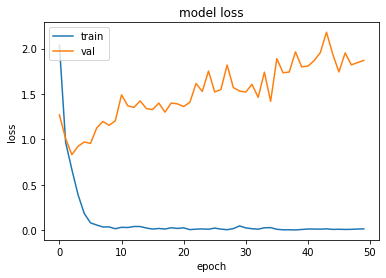

In [28]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

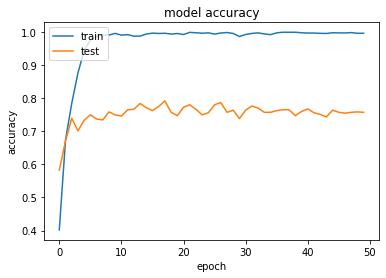

In [27]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
os.chdir(path)

In [30]:
model.save('model_50epoch.h5')

In [32]:
'''import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('model_50epoch.h5')'''

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
